# VAERS DATA 2019: Exploratory Data Analysis


### Main Objectives

1. Understand shape and data type description for all features in DATA2019 dataframe
2. Reveal and understand the distribution of feature variables in DATA2019 dataframe
3. Create relevant plots of varaible data distribution to address research question
4. Perform data cleaning methods such as removing or imputing missing values
5. Synthesize results

### VAERS DATA2019 Features




| Header        | Type (Max characters or format) | VAERS 2 Form | VAERS 1 Form | Description of Contents                              |
|---------------|---------------------------------|--------------|--------------|-----------------------------------------------------|
| VAERS_ID      | Num (7)                         | Not derived  | Not derived  | VAERS identification number                          |
| RECVDATE      | Date                            | Not derived  | Not derived  | Date report was received                             |
| STATE         | Char (2)                        | Derived      | Box 1        | State                                               |
| AGE_YRS       | Num (xxx.x)                     | Item 6       | Box 4        | Age in years                                        |
| CAGE_YR       | Num (xxx)                       | Derived      | Derived      | Calculated age of patient in years                  |
| CAGE_MO       | Num (x.x)                       | Derived      | Derived      | Calculated age of patient in months                 |
| SEX           | Char (1)                        | Item 3       | Box 5        | Sex                                                 |
| RPT_DATE      | Date                            | Discontinued | Box 6        | Date form completed                                |
| SYMPTOM_TEXT  | Char (32,000)                   | Item 18      | Box 7        | Reported symptom text                              |
| DIED          | Char (1)                        | Item 21      | Box 8        | Died                                                |
| DATEDIED      | Date                            | Item 21      | Box 8        | Date of death                                       |
| L_THREAT      | Char (1)                        | Item 21      | Box 8        | Life-threatening illness                           |
| ER_VISIT      | Char (1)                        | Discontinued | Box 8        | Emergency room or doctor visit                     |
| HOSPITAL      | Char (1)                        | Item 21      | Box 8        | Hospitalized                                       |
| HOSPDAYS      | Num (3)                         | Item 21      | Box 8        | Number of days hospitalized                        |
| X_STAY        | Char (1)                        | Item 21      | Box 8        | Prolongation of existing hospitalization            |
| DISABLE       | Char (1)                        | Item 21      | Box 8        | Disability                                         |
| RECOVD        | Char (1)                        | Item 20      | Box 9        | Recovered                                          |
| VAX_DATE      | Date                            | Item 4       | Box 10       | Vaccination date                                   |
| ONSET_DATE    | Date                            | Item 5       | Box 11       | Adverse event onset date                           |
| NUMDAYS       | Num (5)                         | Derived      | Derived      | Number of days (onset date – vaccination date)      |
| LAB_DATA      | Char (32,000)                   | Item 19      | Box 12       | Diagnostic laboratory data                         |
| V_ADMINBY     | Char (3)                        | Item 16      | Box 15       | Type of facility where vaccine was administered    |
| V_FUNDBY      | Char (3)                        | Discontinued | Box 16       | Type of funds used to purchase vaccines            |
| OTHER_MEDS    | Char (240)                      | Item 9       | Box 17       | Other medications                                 |
| CUR_ILL       | Char (32,000)                   | Item 11      | Box 18       | Illnesses at time of vaccination                    |
| HISTORY       | Char (32,000)                   | Item 12      | Box 19       | Chronic or long-standing health conditions         |
| PRIOR_VAX     | Char (32,000)                   | Item 23      | Box 21       | Prior vaccination event information                 |
| SPLITYPE      | Char (32,000)                   | Item 26      | Box 24       | Manufacturer information                           |
| FORM_VERS     | Char (32,000)                   | Not derived  | Not derived  | VAERS form version 1 or 2                           |
| TODAYS_DATE   | Char (32,000)                   | Item 7       | Does not exist | Date form completed                                |
| BIRTH_DEFECT  | Char (32,000)                   | Item 21      | Does not exist | Congenital anomaly or birth defect                  |
| OFC_VISIT     | Char (32,000)                   | Item 21      | Does not exist | Office/clinic visit                                |
| ER_ED_VISIT   | Char (32,000)                   | Item 21      | Does not exist | Emergency department/room, or urgent care           |
| ALLERGIES     | Char (32,000)                   | Item 10      | Does not exist | Allergies to medications, food, or other products   |

In [227]:
#Import packages
from collections import Counter
import pandas as pd
import numpy as np
import collections, numpy
import mlxtend
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
matplotlib.rcParams['figure.figsize'] = (10, 10)

import nltk
nltk.download('punkt')

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [228]:
# Read in the VAERS DATA2019 dataset
data_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/merged_2017-2023data.csv"
merged_df = pd.read_csv(data_file,  encoding='ISO-8859-1')

<ipython-input-228-c87ab3f4717e>:3: DtypeWarning: Columns (8,11,21) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv(data_file,  encoding='ISO-8859-1')


In [229]:
# create dataframe with DATA2019 dataset
merged_df = pd.DataFrame(merged_df)

In [230]:
# visualize first few rows of VAERS DATA2019
merged_df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,L_THREAT,ER_VISIT,HOSPITAL,...,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,676017,01/01/2017,GA,1.50,M,"After getting Hep A vaccination on 12/20, went...",NaN,NaN,Y,Y,...,Aspiration joint,Bacterial infection,Bacterial test positive,HEPA,MERCK & CO. INC.,M032492,2,IM,LL,HEP A (VAQTA)
1,676017,01/01/2017,GA,1.50,M,"After getting Hep A vaccination on 12/20, went...",NaN,NaN,Y,Y,...,Gait disturbance,Injection site swelling,Red blood cell sedimentation rate,HEPA,MERCK & CO. INC.,M032492,2,IM,LL,HEP A (VAQTA)
2,676017,01/01/2017,GA,1.50,M,"After getting Hep A vaccination on 12/20, went...",NaN,NaN,Y,Y,...,X-ray,NaN,NaN,HEPA,MERCK & CO. INC.,M032492,2,IM,LL,HEP A (VAQTA)
3,676024,01/01/2017,NY,1.58,F,Brought her to Dr's office for respiratory ill...,NaN,Y,Y,Y,...,Bronchoscopy,Cardiac failure,Computerised tomogram,HEPA,GLAXOSMITHKLINE BIOLOGICALS,59n59,1,IM,RL,HEP A (HAVRIX)
4,676024,01/01/2017,NY,1.58,F,Brought her to Dr's office for respiratory ill...,NaN,Y,Y,Y,...,Bronchoscopy,Cardiac failure,Computerised tomogram,MMR,MERCK & CO. INC.,k002527,1,IM,LL,MEASLES + MUMPS + RUBELLA (MMR II)


In [231]:
# describe DATA2019 features
merged_df.describe()

,VAERS_ID,AGE_YRS,HOSPDAYS,NUMDAYS
count,2.316180e+05,231618.000000,17138.000000,214783.000000
mean,1.452167e+06,10.190780,5.535068,21.905817
std,6.572424e+05,7.093826,12.576139,382.545418
min,6.760170e+05,0.000000,1.000000,0.000000
25%,8.129230e+05,2.000000,2.000000,0.000000
50%,1.346505e+06,11.000000,3.000000,0.000000
75%,2.044492e+06,17.000000,5.000000,1.000000
max,2.630839e+06,21.000000,730.000000,36890.000000


In [232]:
# shape of merged 2017-2023 dataframe
merged_df.shape

(231618, 37)

In [233]:
# column names
merged_df.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'SEX', 'SYMPTOM_TEXT',
       'DIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY',
       'DISABLE', 'RECOVD', 'NUMDAYS', 'LAB_DATA', 'OTHER_MEDS', 'CUR_ILL',
       'HISTORY', 'PRIOR_VAX', 'SPLTTYPE', 'BIRTH_DEFECT', 'OFC_VISIT',
       'ER_ED_VISIT', 'ALLERGIES', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3',
       'SYMPTOM4', 'SYMPTOM5', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT',
       'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME'],
      dtype='object')

In [234]:
merged_df.isna().sum()

VAERS_ID                0
RECVDATE                0
STATE               16168
AGE_YRS                 0
SEX                     0
SYMPTOM_TEXT          372
DIED               230181
L_THREAT           226336
ER_VISIT           225336
HOSPITAL           210107
HOSPDAYS           214480
X_STAY             231422
DISABLE            224885
RECOVD              29293
NUMDAYS             16835
LAB_DATA           128256
OTHER_MEDS          98758
CUR_ILL            102904
HISTORY             98366
PRIOR_VAX          221788
SPLTTYPE           194529
BIRTH_DEFECT       231435
OFC_VISIT          172338
ER_ED_VISIT        193986
ALLERGIES          107755
SYMPTOM1                0
SYMPTOM2            67789
SYMPTOM3           125506
SYMPTOM4           155820
SYMPTOM5           176299
VAX_TYPE                0
VAX_MANU                0
VAX_LOT             49868
VAX_DOSE_SERIES      3226
VAX_ROUTE           35381
VAX_SITE            43545
VAX_NAME                0
dtype: int64

In [235]:
merged_df['HISTORY'].tail()
# might map to ICD 10

231613    none
231614     NaN
231615     NaN
231616    None
231617     NaN
Name: HISTORY, dtype: object

In [236]:
merged_df['CUR_ILL'].tail()
# might also map to ICD 10

231613    none
231614     NaN
231615     NaN
231616    None
231617     NaN
Name: CUR_ILL, dtype: object

In [237]:
# drop unnecessary columns
merged_df = merged_df.drop(columns = ['RECVDATE', 'STATE', 'VAX_MANU', 'VAX_LOT',
       'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE'])

In [238]:
merged_df.isna().sum()

VAERS_ID             0
AGE_YRS              0
SEX                  0
SYMPTOM_TEXT       372
DIED            230181
L_THREAT        226336
ER_VISIT        225336
HOSPITAL        210107
HOSPDAYS        214480
X_STAY          231422
DISABLE         224885
RECOVD           29293
NUMDAYS          16835
LAB_DATA        128256
OTHER_MEDS       98758
CUR_ILL         102904
HISTORY          98366
PRIOR_VAX       221788
SPLTTYPE        194529
BIRTH_DEFECT    231435
OFC_VISIT       172338
ER_ED_VISIT     193986
ALLERGIES       107755
SYMPTOM1             0
SYMPTOM2         67789
SYMPTOM3        125506
SYMPTOM4        155820
SYMPTOM5        176299
VAX_TYPE             0
VAX_NAME             0
dtype: int64

<ipython-input-239-1a846840fd04>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_subset.corr()


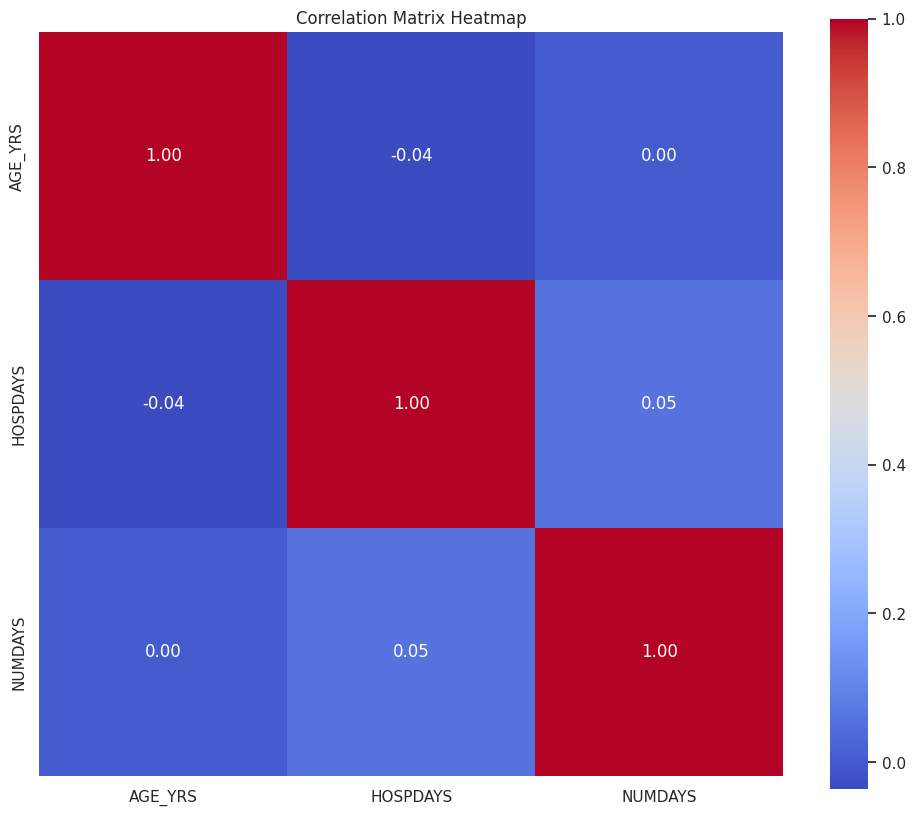

In [239]:
df_subset = merged_df.drop(columns = ['VAERS_ID'])

# Assuming df is your VAERS DATA dataframe
corr_matrix = df_subset.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### AGE_YRS

Performed prior to merge of 2017-2023 (see notebook)

In [240]:
merged_df.shape

(231618, 30)

In [241]:
merged_df['AGE_YRS'].value_counts()

17.00    17236
16.00    15375
11.00    14030
4.00     13366
18.00    12232
         ...  
4.42         1
0.26         1
2.80         1
4.58         1
0.07         1
Name: AGE_YRS, Length: 99, dtype: int64

In [242]:
merged_df['AGE_YRS'].isna().sum()

0

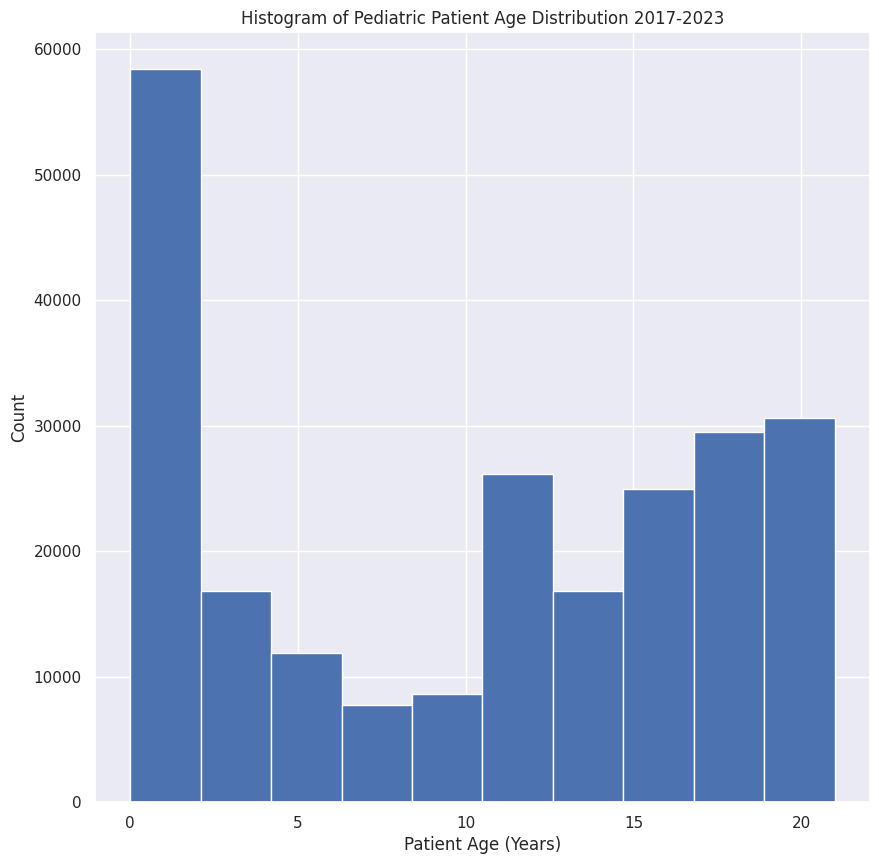

In [243]:
# Perform data visualization
# Histogram
plt.hist(merged_df['AGE_YRS'])
plt.xlabel('Patient Age (Years)')
plt.ylabel('Count')

plt.title('Histogram of Pediatric Patient Age Distribution 2017-2023')

plt.show()

In [244]:
print(merged_df['AGE_YRS'][merged_df["AGE_YRS"] == 0.08])

58        0.08
59        0.08
60        0.08
61        0.08
62        0.08
          ... 
230178    0.08
230179    0.08
230180    0.08
230181    0.08
230182    0.08
Name: AGE_YRS, Length: 1682, dtype: float64


In [245]:
age_ranges = [(0, 28/365), (28/365, 1), (1, 5), (5, 12), (12, 21)]
age_categories = ['neonate', 'infant', 'toddler', 'child', 'adolescent']

# Create an empty list to store the age bucket categories
age_buckets = []

# Iterate over each value in 'AGE_YRS'
for age in merged_df['AGE_YRS']:
    for i, cat_range in enumerate(age_ranges):
        if cat_range[0] <= age <= cat_range[1]:
            age_buckets.append(age_categories[i])
            break

# Create a new column 'AGE_BUCKET' in the DataFrame
merged_df['AGE_BUCKET'] = age_buckets



In [246]:
merged_df[['AGE_YRS','AGE_BUCKET']].head()

,AGE_YRS,AGE_BUCKET
0,1.50,toddler
1,1.50,toddler
2,1.50,toddler
3,1.58,toddler
4,1.58,toddler


In [247]:
merged_df['AGE_BUCKET'].value_counts()

adolescent    101887
child          46501
toddler        43136
infant         39850
neonate          244
Name: AGE_BUCKET, dtype: int64

In [248]:
print(merged_df['AGE_BUCKET'][(merged_df["AGE_YRS"] >= 0.0767123) & (merged_df["AGE_YRS"] <= 1)])


11        infant
12        infant
13        infant
14        infant
15        infant
           ...  
231597    infant
231598    infant
231608    infant
231609    infant
231614    infant
Name: AGE_BUCKET, Length: 39850, dtype: object


In [249]:
print(merged_df['AGE_YRS'][merged_df["AGE_BUCKET"] == 'child'])

19         9.0
20         9.0
22        12.0
52        11.0
53        11.0
          ... 
231581    12.0
231583    10.0
231584    10.0
231588     7.0
231607     7.0
Name: AGE_YRS, Length: 46501, dtype: float64


In [250]:
merged_df.columns

Index(['VAERS_ID', 'AGE_YRS', 'SEX', 'SYMPTOM_TEXT', 'DIED', 'L_THREAT',
       'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD',
       'NUMDAYS', 'LAB_DATA', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX',
       'SPLTTYPE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES',
       'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5', 'VAX_TYPE',
       'VAX_NAME', 'AGE_BUCKET'],
      dtype='object')

#### SEX

In [251]:
merged_df['SEX'].value_counts()

F    117021
M    104924
U      9673
Name: SEX, dtype: int64

In [252]:
merged_df = merged_df[merged_df['SEX'] != 'U']

In [253]:
merged_df.shape

(221945, 31)

In [254]:
merged_df['SEX'].value_counts()

F    117021
M    104924
Name: SEX, dtype: int64

In [255]:
# re-coding categorical variables
merged_df['SEX'].replace({'M': 0, 'F':1}, inplace=True)

#### DIED

In [256]:
merged_df['DIED'].fillna('N', inplace=True)

In [257]:
merged_df['DIED'].value_counts()

N    220531
Y      1414
Name: DIED, dtype: int64

In [258]:
# re-coding categorical variables
merged_df['DIED'].replace({'N': 0, 'Y':1}, inplace=True)

#### L_THREAT

In [259]:
merged_df['L_THREAT'].fillna('N', inplace=True)

In [260]:
merged_df['L_THREAT'].value_counts()

N    216681
Y      5264
Name: L_THREAT, dtype: int64

In [261]:
# re-coding categorical variables
merged_df['L_THREAT'].replace({'N': 0, 'Y':1}, inplace=True)

#### ER_VISIT

In [262]:
merged_df['ER_VISIT'].fillna('N', inplace=True)

In [263]:
merged_df['ER_VISIT'].value_counts()

N    215694
Y      6251
Name: ER_VISIT, dtype: int64

In [264]:
# re-coding categorical variables
merged_df['ER_VISIT'].replace({'N': 0, 'Y':1}, inplace=True)

#### HOSPITAL

In [265]:
merged_df['HOSPITAL'].fillna('N', inplace=True)

In [266]:
merged_df['HOSPITAL'].value_counts()

N    200566
Y     21379
Name: HOSPITAL, dtype: int64

In [267]:
# re-coding categorical variables
merged_df['HOSPITAL'].replace({'N': 0, 'Y':1}, inplace=True)

#### HOSPDAYS

In [268]:
merged_df['HOSPDAYS'].fillna(0.0, inplace=True)

In [269]:
merged_df['HOSPDAYS'].value_counts()

0.0      204883
2.0        3739
1.0        3153
3.0        2924
4.0        1701
          ...  
43.0          1
48.0          1
178.0         1
53.0          1
730.0         1
Name: HOSPDAYS, Length: 68, dtype: int64

In [270]:
merged_df['HOSPDAYS'].isna().sum()

0

#### X_STAY

In [271]:
merged_df['X_STAY'].fillna('N', inplace=True)

In [272]:
merged_df['X_STAY'].value_counts()

N    221749
Y       196
Name: X_STAY, dtype: int64

In [273]:
# re-coding categorical variables
merged_df['X_STAY'].replace({'N': 0, 'Y':1}, inplace=True)

#### DISABLE

In [274]:
merged_df['DISABLE'].fillna('N', inplace=True)

In [275]:
merged_df['DISABLE'].value_counts()

N    215233
Y      6712
Name: DISABLE, dtype: int64

In [276]:
# re-coding categorical variables
merged_df['DISABLE'].replace({'N': 0, 'Y':1}, inplace=True)

#### RECOVD

In [277]:
merged_df['RECOVD'].fillna('U', inplace=True)

In [278]:
merged_df['RECOVD'].value_counts()

Y    91398
U    84450
N    46097
Name: RECOVD, dtype: int64

In [279]:
merged_df['RECOVD'].replace({'N': 0, 'Y': 1, 'U': -1}, inplace=True)

#### NUMDAYS

In [280]:
merged_df['NUMDAYS'].fillna(0.0, inplace=True)

In [281]:
merged_df['NUMDAYS'].value_counts()

0.0       138396
1.0        32778
2.0        10058
3.0         4928
4.0         2962
           ...  
2132.0         1
902.0          1
6373.0         1
1054.0         1
673.0          1
Name: NUMDAYS, Length: 871, dtype: int64

#### BIRTH_DEFECT

In [282]:
merged_df['BIRTH_DEFECT'].fillna('N', inplace=True)

In [283]:
merged_df['BIRTH_DEFECT'].value_counts()

N    221762
Y       183
Name: BIRTH_DEFECT, dtype: int64

In [284]:
# re-coding categorical variables
merged_df['DISABLE'].replace({'N': 0, 'Y':1}, inplace=True)

#### OFC_VISIT

In [285]:
merged_df['OFC_VISIT'].fillna('N', inplace=True)

In [286]:
merged_df['OFC_VISIT'].value_counts()

N    162904
Y     59041
Name: OFC_VISIT, dtype: int64

In [287]:
# re-coding categorical variables
merged_df['DISABLE'].replace({'N': 0, 'Y':1}, inplace=True)

#### ER_ED_VISIT

In [288]:
merged_df['ER_ED_VISIT'].fillna('N', inplace=True)

In [289]:
merged_df['ER_ED_VISIT'].value_counts()

N    184424
Y     37521
Name: ER_ED_VISIT, dtype: int64

In [290]:
# re-coding categorical variables
merged_df['DISABLE'].replace({'N': 0, 'Y':1}, inplace=True)

#### ALLERGIES

In [291]:
# changing all allergies to be lower case so that unique values can be found
merged_df['ALLERGIES'] = merged_df['ALLERGIES'].astype(str)
merged_df['ALLERGIES'] = merged_df['ALLERGIES'].apply(str.lower)

In [292]:
# obtaining count of unique terms in column 'ALLERGIES' by looping through each row in dataframe
count = 0
for allergy in merged_df['ALLERGIES'].unique():
    count = count + 1
# print unique 'ALLERGIES' term count
print(count)

#for allergy in merged_df['ALLERGIES'].unique():
    #print(allergy)

10045


##### Replacing all variations of missing values: "None" or "NA" to "NKDA"

All missing values or variations including but not limited toof "No Allergies", "None", "NA", or "Unknown", will be replaced with No Known Drug Allergies (NKDA). If the patient or guardian indicated they may have allergies but specific food/drug for which the patient is allergic to is unknown, the patient will be assigned NKDA.

In [293]:
# filling all missing values with "NKDA"
merged_df['ALLERGIES'].fillna('NKDA', inplace=True)
# replacing variation for "NA", "None", "Unknown" with "NKDA"
merged_df['ALLERGIES'].replace(['None', 'NKA  to meds and unknown about foods.', 'denies', 'none prior reaction', 'none prior vaccine', 'none listed.', 'none stated', 'none to date', 'none listed', 'niksa', 'nks', 'nk', 'ns', 'n k', 'nka', 'nkdaq', 'nkd', 'nkn', 'nika', 'nnkda', 'n/s', 'nd', 'nka nkda', 'nnka', 'nknd', 'nkad', 'nkna', 'nkfa nkda', 'nkdc', 'nkma nkfa', 'nkda-', 'nkda/nkfa', 'nka nkma', 'knda', 'nkma/nka', 'unkn', 'nhda', 'nkda/ nka', 'nkba', 'nkfa mkma', 'nothing documented', 'nothing noted', 'nothing reported', 'known/documented', 'non known documented', 'nothing reported parent', 'reported parent', 'mother reported', 'na reported point', 'known documented', 'unknown reported', 'reported prescreen', 'documented', 'known reported chart', 'unknown noted', 'nka/ reported', 'know drug reported', 'reported var', 'reported consent', 'nothing reported patient mother', 'reported appointment', 'reported chart', 'mother report medications', 'unknown time', 'reported drug', 'nka reported father', 'noen reported', 'nothing known', "reported patient 's mother", 'non noted', 'unknown egg vaccines', 'unknown vaccines', 'known time vaccine', 'known vaccine', 'reported client', 'known reported', "per patient 's mother", 'none at this time', 'none known at the time', 'none at time', 'none known at that time.', 'none known at the time of vaccines', 'not at this time', 'none at time of vaccine', 'none at that time', 'unknown at this time', 'nka listed', 'none.', 'no known allergies','none to medications or food',"reported client 's mother", 'reported mother', 'reported time', 'reported per father', 'reported time visit', 'reported patient mother', 'nkda reported time visit', 'reported patient', 'according patient mother', 'reported father client', 'reported mother/patient', 'reported time vaccination', 'known drug reported mother patient', "according patient 's chart", 'according patients mother', 'reported father', 'reported time immunization', 'reported time event', 'nka time vaccination', 'per patients mother', 'endorsed time vaccination', 'father denied time vaccination', 'noted patient', 'time vaccination', 'nkda reported father', 'reported', 'reported time/date vaccination', 'reported per mother', 'reported time incident', 'vaccination', 'indicated time vaccination', 'egg unknown time vaccinations', 'milk soy known time vaccinations', 'nkda time vaccination', 'noted patient parent', 'noted reported time event', 'listed patient/parent', 'known reported time visit', 'known reported parent time visit', 'known listed patient', 'nkda prior vaccine reaction', 'according patient profile', 'report', 'unknown reaction vaccinations', "documented according patient 's profile", 'no allergies to medication or food', 'none to medications', 'none known', 'no', 'No', 'None known', 'No known allergies', 'No Know Drug or Food Allergies', 'none', 'NKA', 'NONE', 'no prior vaccine allergies', 'no known drug allergies at time of vaccination.','no allergies reported', 'nka ,nkda', 'nka/nkda','not reported in consent form.','no drug allergy','none reported by parent','no known drug allergies & no known food allergies', 'nkda.', 'nkfda', 'nkd', 'nk', 'nkdas', 'nkw', 'n.k.d.a.', 'n/k', 'per patient, no known drug allergies and no known food allergies.', 'no known drug allergies, no known food or environmental allergies', 'no known drug allergies or allergies to food', 'no known drug allergies, unknown food/other products', 'nkda (no known drug allergies), no food or other products allergies.','no known allergies. definitely no allergies to chicken products (consume chicken and eggs almost daily).','nkda or allergies to foods','nkfa/nkda','no known allergys','none. mom was concerned that baby was allergic to salmon. she had eaten it the night before and had vomited once earlier that day after eating oatmeal.  but no other symptoms.','nkda or food','not known. when filling out patient consent form denied allergy to medications, food components, vaccine components or latex','none that are known.','nkda or otherwise','none prior to this','no know alergies to anything', 'no allergies to anything', 'not allergic to anything','not listed','nkda/nkfa','did not have any known allergies prior to vaccine','no allergy (see continuation) patient prefers not to take amoxicillin due to increased incidence of yeast infections. not an allergy per the patient.','no known allergies per patient','she was perfectly healthy prior to this vaccine other then the common flu ear infection','not to our knowlege','none noted on history form','no  history of adverse reactions to drugs no history of adverse reactions to hymenoptera stings no history consistent with food intolerance no history consistent with latex intolerance.', 'no  history of adverse reactions to drugs no history of adverse reactions to hymenoptera stings no history consistent with food intolerance no history consistent with latex intolerance .', 'no  history of adverse reactions to drugs no  history of adverse reactions to hymenoptera stings no  history consistent with food intolerance no  history consistent with latex intolerance', 'he reports a history of adverse reactions to cipro characterized by throat swelling and sob. no history of adverse reactions to hymenoptera stings no history consistent with food intolerance no history consistent with latex intolerance', 'no allergies, however vaccine was order by resident doctor, verbal discussion stated vaccine was not valid due to age, however per resident doctor and faculty order me to proceed with vaccine administration.','nkda and nka','nkda, nka','none that we are aware of','none at the time','no know drug allergy and no know food allergy','nonr','none that are known','no known  drug or food allergies', 'nkda/no known food allergies', 'no known drug or food allergies.', 'no known drug, food or other allergies', 'no known drug/ food/ or environmental allergies', 'only known environmental allergies', 'hydrocodone and environmental allergies','none listed on consent form','none reported to the pharmacy','not sure','none known previously','do not remember or know','none identified','no know allergies','no known drug allergies; food unknown','none reported by patient','no known allergies to medications. unknown allergies to food or other products','kna','nkda; no allergies','no food or drug allergies','n.k.d.a','not known','none patient is aware of','none known.','no reported allergies','none that we are yet aware of','no known drug allergy','no known food, drug, latex, or venom allergies.','none per patient','no known allergies to foods or medications','unknown.','no known','nkda no allergies','none previously.','none disclosed','nka.','no known drug allergies or food','no allergies','none reported','knda','nka, nkda','unaware','none, answered question on sheet that they do not have allergies','no known allergies.','no allergies marked on the consent and release form''unknown','listed none on consent form','none known allergies','no known allergy','no known alergies','no known drug allergies', 'unknown', 'nka', 'nan', 'none; nka', 'nono', 'non', 'none+', 'nonw', 'nnone', 'no medication or food allergies reported', 'nkda / nka', 'nkda; nkfa', 'nkda nkfa', 'nkda  nkfa', 'nkda, nkea, nkfa', 'nkda; n/a', 'nkda; nka', 'nka / nkda', 'nkda/nkma', 'nka n/a', 'nkda,nka', 'nkda, nkfa', 'knda knfa', 'nkda/nka', 'nkda, nfa', 'nkda nka', 'nkda  nka', 'nka nkda', 'nkfa, nkda', 'nka, nkda.', 'n.k.d.a n/a', 'nkfa  nkda', 'nka,nkda', 'none- nkda', 'none, nkda', 'none; nkda', "none (nkda)"], 'NKDA', inplace=True)

In [294]:
# replacing variation for "NA", "None", "Unknown" with "NKDA"
merged_df['ALLERGIES'].replace(['no medication or food allergies', 'unknown', 'nkd', 'nka', 'per', 'ndk' 'uk', 'unk', 'nka of food', 'no allergies listed','nothing notablw', 'nothing known', 'parent, denies, allergies', 'know n drug', 'known drug', 'indicated vaccination consent form', 'listed vaccine consent form', 'indicated vaccine consent form', 'parent indicated covid consent form', 'denied by parent', 'listed consent form', 'listed per consent form', 'per consent form', 'vaccination consent form', 'report vaccine consent form', 'checked consent form', 'per vaccine consent form', "stated patient 's consent form", 'listed consent', 'stated mother vaccine consent form', 'declared vaccination consent form', 'per immunization consent form', 'medications listed vaccination consent form', 'known per parent', 'known patient', 'known per chart', 'known listed chart', 'known time', 'known per patient', 'known reported patient', 'known chart', 'known drug reported patient', 'known per parents', 'known medication listed chart', 'per patient', 'noted chart', 'known per father', 'known allergies/per father', 'known listed patients chart', 'per father', 'per mother patient', 'known medications foods listed', 'per mother', 'per patient known', "non listed patient 's profile", 'known medications products', 'nkda per patient', 'known mentioned patient', 'reports known medications foods products', 'per parent', 'confirmed medications products', 'non per father', 'none-per mother', 'known per patient statement', "per 's mother", 'medications foods time', 'medications foods', 'unknown listed', 'unknown writer', 'non known time', 'unknown asked', 'nkda per mother', 'nkda hay fever per mother', 'per father n/a', 'unknown listed system', 'knew time', "nka per patient 's chart", 'drug per patient', 'nka per mother report', 'known medications products reported patient', 'known per mother', 'medication file', 'per chart', 'per patient chart known', 'per mother child', 'known medication known listed well', 'nka per mother', 'patient knows', 'n/a per patient', 'knda unknown', 'nd known', 'nkda known', 'nka known', 'nkown', 'nkanone', 'non', 'nbone', 'noe', 'noone', 'none1', 'nope', 'unknown-', 'drug known', 'unknow', 'non3', 'nkda unknown', "n't know", 'nione', 'noen', 'nine', 'nkdas known', 'note', 'nonfe', 'nka nkda reported', 'nkda/no reported', 'unknown/not reported', 'nkda reports egg', 'non reported', 'nkda reported', 'nkda/nka reported', 'nka reported', 'tape reported', 'aware reported', 'nkda noted', 'known patient reported', 'known medications foods anything else', 'known medications foods products', 'known medications products noted', 'known medication known anything', 'known medications foods environmental', 'known meds foods environmental', 'medications/foood environmental', 'medications environmental trinax', 'nkda medication', 'nka medication', 'medication', 'medications', 'non known medication', 'foods medications', 'known foods medication', 'denies food/medications', 'n/a per', 'n/a per mom', 'n/a per mother', 'nkda per father', 'known per mom', 'nka per mom', 'nka per emr', 'nkda per mom', 'per mom', 'nonew', 'nones', 'nonoe', 'nobne', 'nonec', 'one', 'nobe', 'mone', 'per immunization administration form', 'per vaccination administration record', 'per vaccine administration record', 'stated vaccine administration record', 'nkda prior vaccine administration', 'nkda prior vaccination', 'indicated vaccine administration record', 'known prior vaccine administration', 'nons', 'noun', 'nona', 'noon', 'known medications products noted time vaccination', 'known medications products reported noted time event', 'known medication product time vaccination', 'denied medications products time vaccination', 'medications products noted time vaccination', 'n.k.a', 'n.k.d.a', 'n.k.d', 'n. k. d.','per screening checklist', 'according screening checklist', 'listed screening checklist', 'reported per screening checklist','nkda nka food/products', 'nkda food/other products', 'nkda foods products', 'nkda known product', 'nkda product', 'nkda known products', 'nkda products listed', 'nkda food/other', 'nkda/fa/other', 'nkda products', 'known medication noted', 'denies medications', 'medications- products unknown', 'known medications foods', 'know medications foods products', 'patient refers medications products', 'parent reports medications products', 'nkda listed medication products', 'known foods medications animals products', 'medication product',  'meds foods products',  'known medication foods', 'known previously', 'known previous', 'known products', 'known prior', 'noted screening form', 'documented screening form', 'noted ahlta flu screening form', 'reported screening form', 'indicated screening form', 'listed screening form', 'listed consent screening form', 'indicated screening questionnaire', 'indicated consent form', 'per patient medication', 'patient denies medications', 'patient denies medications foods', 'patient medication', 'per patient metal', 'per patient questions', 'parent denies medication foods', 'per patient report', 'dilated pain medication', 'known allegy', 'known allegries', 'known allergens', 'known egg', 'known allergiest', 'known allgergies', 'known allergeis', 'known yet', 'known drug allegies', 'known family', 'knownallergies', 'known allgeries', 'known drug listed', 'known drug pineapples', 'known drugs', 'known drug products', 'known drugs products', 'known drug food/product', 'known drug lactose', 'known meds products', 'known drug noted', 'known drug product', 'known diagnosed', 'nkda n/a', 'knda nka', 'nka knda', 'nka/ nkda', 'nkda/', 'nkdfa', 'nkda', 'nkda nka', 'nknda', 'nkma nka', 'nka/nkfa', 'nkda./nka', 'nada', 'nkda/no', 'nana', 'n/an/a', 'nkda nkfa', 'nkda nkma nkfa', 'nkda/nk', 'nkda nkma', 'nkda 0', 'nlda', 'knda knfa', 'nkda nkfa nkea', 'mop denies', 'denies', 'mother denies', 'mom denies', 'denied', 'mom denied', 'deneis', 'mother denies child', 'mother deinis', 'identified', 'mom child denies', 'mother denied', 'known known drug', 'known drug latex', 'known date', 'know drug', 'n known drug', 'known known', 'ko known', 'know date', 'non known', 'known durg', 'unknown', 'nknown', 'pollen known', 'no/unknown', 'known',  'medications, food, products', 'patient, denies, allergies, medications, foods', 'no allergies declared', 'ndka', 'nkaa', 'nkma', 'lnda', 'n/aa','none listed.', 'none stated', 'none to date', 'none stated.by the patient.', 'none listed by patient', 'not listed by patient', 'none stated by patient.', 'none noted by client', 'none listed', 'nka listed', 'patient denied', 'none, per, parent', 'per, parent', 'none, previous', 'none, previous, shots', 'none, previously', 'nkda, allergies, unknown', 'nkda, allergies, foods', 'none, prior, vaccine', 'none, prior, reaction', 'none, vaccine', 'none, mentioned', 'none, noted', 'none, documented', 'non, known, documented', 'none, know', 'patient denies', 'none reported at time of vaccination', 'none known at time of vaccination', 'none at time of vaccination', 'none at time of immunization', 'none known at this time or prior to vaccinations.', 'none on record', 'none recorded', 'nkda', 'knma', 'n/a', 'na', 'nkdn', 'nksa', 'mkda', 'n/a.','nkda or to food', 'nkda or foods', 'none to my knowledge', 'none to our knowledge', 'no allergies listed', 'no allergies declared', 'no known medication or food allergies', 'no know drug or food allergies', 'no know drug allergies', 'no known medical allergies', 'no known drug alerlgies', 'nkda no known food allergies', 'none known drug or food allergy', 'no known medication/food  allergies', 'nkda  no food allergies', 'nkda; no food allergies', 'no med allergies', 'no known drug/food allergies', 'no known drug allergy, no food allergy', 'no documented allergies.', 'no known drug allergies.', 'no other allergies', 'ndka and no known food allergies', 'nkda, or food allergies', 'no known drug or food allergy', 'no known food, latex, medication, or venom allergies.', 'no indications of any allergies', 'no known allergied', 'no lnown allergies', 'nkda, no food allergies', 'not known allergies', 'no kn own allergies on record.', 'no none drug allergies', 'bactrim. no other allergies', 'no known food, latex, or medication allergies prior to event.', 'no known allegies', 'no known drug allergies on file', 'no known allergies reported', 'none/no known allergies', 'no known med allergies', 'none known allergies.', 'no known medication allergies.', 'nk known allergies', 'no known allergies listed', 'no known medication allergies or otherwise', 'no allergies noted', 'no documented allergies', 'no known allergies in computer', '; no known drug allergies', 'no food or med allergies', 'unknown allergies', 'no known allergies listed in chart', 'no know dx allergies', 'no food and no drug allergies', 'no allergies on file', 'not know allergies at this time', 'latex no other known allergies', 'no known medication, food, or other allergies.', 'none, seasonal allergies', 'no true allergies.', 'just seasonal allergies', 'not known allergy', 'no history of allergies.', 'no drug allergies known', 'dog dander, seasonal allergies', 'no allergies documented', 'nkda, no other known allergies', 'no known allergies to medications', 'no known drug or food allergies', 'unknown food allergy', 'no food allergies', 'seasonal allergies', 'no known allergies, ', 'no known food or drug allergies', 'no drug allergies', 'no known drug allergy  no known material allergy', 'nkda or food allergies noted.', 'nkda and no recorded allergies', 'no previous allergies', 'nkda or allergies noted.', 'no known food/drug allergies', 'no known  allergies', 'no  allergy', 'nkda or food allergies', 'no known medication allergies', 'no listed or known allergies', 'no knowns allergies', 'nkda  no other allergies known', 'no known allergies to either food or medication', 'no known drug alleries', 'nkda  seasonal allergies', 'no allergies to above', 'no other known allergies', 'no know allergy', 'no  known allergies', 'no known allergies on file', 'nkda, no known food allergies', 'no known allergies at this time', 'no know allergies reported', 'no prior known allergies', 'no knoen allergies', 'no known allergies to food or meds', 'no know allegies', 'no known food or drug allergies.', 'no allergies.', 'no known allergies per daughter', 'nkda or no known food allergies', 'no known allergies to drugs or foods', 'denies allergies', 'no known food, drug, or venom allergies', 'no  known food or drug or other product allergies', 'no known allergies to medications on file', 'not known of any allergies to medications', 'no allergies known', 'no known allergies to foods, products, or medications', 'no allergies to medication', 'no allergies reported.', 'no allergies on profile.', 'no know allergies at the time', 'no known allergies until this vaccination.', 'no allergies listed on profile', 'no allergy', 'no known allergies to medications or food.', 'no drug allergy reported', 'no known allergies to food nor medications noted', 'no allergy to medicine', 'not known at the time', 'no known allergies to medication, food or other products', 'no allergies to products', 'allergies to dust', 'stated no allergies', 'no known allergies to medications, food, or other products', 'no known food, drug, or other allergy.', 'no known allergies to medications, foods, or other products', 'no known allergies to medications, food or other products.', 'nkda  no know allergies to food or other products', 'no known allergies to drugs or food.', 'none per parent',  'nka-none', 'no allergies to any medication or food',  'documentation reflects parent denied allergies to medications, food, a vaccine component or latex. parent denied a severe allergic reaction to a vaccine in the past.',  'unknown, not reported by patient on consent form',  'mom reported the last set of shots child had been given caused a very large, red, raised, and warm to the touch area on her arm. mom was unsure what specific vaccine caused the reaction, and agreed to have child receive the mmrv vaccine on 1/20/2023.', 'nka/ none reported', 'nkda, no  other allergies', "one medication, can't remember name ?sulfa?",  'mom says no', 'n/a this is a baby', 'none known but patient was stung by a wasp after the vaccinations were administered and prior to the reaction starting', 'unknown, but not to vaccines or injectable medications',  'none reported on paper work or verbalized on vaccination day.', 'none prior to event', 'on ketogenic diet for seizures',  'according to profile - no known drug allergies', 'i have post nasel drip & i?m probably allergic to red-dye.', 'no know',  'answered no to "have you ever had a severe allergic reaction to something, or a reaction that you were treated with epinephrine or epipen, or for which you had to go to the hospital?", on the consent form the parent filled out', 'episode of beauty product allergy and cereal allergy. specific allergy not known.  appointment with allergist today 10/14/21.', 'parent denied any allergies to medications, food, or other products.', 'no known allergies of any kind prior to 5/18/22', 'patient denied to have any allergies',  'no known allergies as per parents', "stated un-named, allergic reaction to two un-named antibiotics per mother's info on health screening form dated 3/12/19.", 'denied on questionnaire.', 'nka according to consent form', 'yes to some type of medication possibly an antibiotic', 'non ereported, as per mom',  'no known allergies to medications.',  'zero',  'patient reported no alleriges', 'no prior allergies known', 'nkfa, mkma', 'none reported by father', 'none known or reported by patient', 'none at time of vaccination.  after seeing pediatrician pt dx with allergy to jev.', 'patient has nkda, has celiac disease', 'no allergies to food or products', 'none confirmed', 'n o allergies to food or meds', 'unknown per caregiver', '- none', 'no known medication allergies environmental allergies', 'multiple airborne but no known food or medication allergies. has had overreaction to mosquito bites.', 'no known medication allergies environmental allergies', 'none given', 'denies any allergies.', 'no known drug allergies, no known seasonal allergies', 'no allergies to vaccines or injectable medication.  mark no to having allergic reaction.', 'none nkda', 'family is suspicious of allergy to wheat', 'none before', 'nka  knda', 'nkda or other allergies.', 'nka to meds, unknown to others', 'face itching since age 6 month (unknown cause) allergy test never done, too young.', 'per mom: pt is allergic to bug bite', 'allergy history unknown', 'none per screening checklist', 'not to knowledge', 'unknown-var not in front of me', 'none noted.', 'no reported allergies at time of vaccination', 'nkda. ?egg', 'none known to family', 'no known drug allergies reported by patient', 'none noted on file', 'allergies began at the age of 4 months. including eczema.',  'none per patients mother', 'not  known', 'grandma states he has none  has allergies to seasonal things', 'history of egg allergy but outgrown', 'no allergies to medications listed on vaccination consent form.', 'no allergies at the time', 'client denies any allergies',  'nkdas or no other allergies known', 'nkda, no allergies', 'nkda/no allergies', 'pt reported none', 'none known.   has had vomiting in past with yogurt but tolerates other dairy products', 'none i am aware of.', 'nkda, no allergies to foods', 'allergy rhinitis',  'none noted on consent form completed by mother who was present at time of vaccination.',  'no known allergies. earlier allergy testing indicated an allergy to coconut and cinnamon, however these are eaten regularly with no adverse reaction, but were not eaten within several weeks of vaccination.',  'no known allergies, as reported in chart', 'nothing reported by patient and mother.',  'nothing reported by patient and mother.', 'knda, unknown', 'patient reported nka',  'none listed in record', 'nkda / nkfa', 'no history of allergies', 'no issues-  vaccinated a minor.', 'none listed in ehr - unable to contact patient on phone', 'none  mom reported', 'multiple allergies to medications', 'some soaps and orange juice and tomato paste - however i think the food allergy is due to young age', 'no allegeries according to mother', 'pt states unknown', 'no/ na', 'nka( no known allergies)', 'had past allergic reaction to incense',  'nkda. h/o eczema, worse after playing in dirt.',  "none listed on patient's profile", 'nka at time of vaccines', 'mother is allergic to codeine, instructed by pcp to list this as an allergy as a precaution. no known/observed allergies.','no known allergies per mom attestation', 'patient did not disclose.', 'none listed in our system', 'none  known', 'unknown. no history of severe allergic reaction', 'no allergies reported per screening checklist', 'allergic reaction to allergy shot', 'none at the time.  now he has several', 'nkda/no other reported allergies', 'patient was unaware of any allergies.', 'reported none on medical screening', 'none; no known drug allergies',  'not applicable.', 'nka per health questionnaire', 'not indicated in pre-health screening', 'unknown-do not have var present', 'none, patient confirmed', '2no', 'no, nkda', 'nd known allergies', 'prior history of milk  allergy.  pt  currently drinks   lactose  free  milk  without any  difficulties', 'none as per parent (mother) statement.', 'no known allergies to medications or food', 'none, per pt. report', 'nkda, no allergies reported to eggs, gelatin or brewers yeast.', 'unk.', 'no allergies recorded', 'so far none', 'no known of allergies.', 'no listed allergies', 'no known drug, food, product allergies', 'no1/31 and', 'no  known drug allergy', 'denies known allergies', 'not asked', 'nka or nkda',  'nkma flonase causes headaches', 'minor stomach issues', 'no medications', 'patient reports no allergies',  'no known allergies to food or medication', 'none disclosed or known of', 'none disclosed at time of assessment.', 'no known allergies to food, medications or other products.', 'no history of adverse reactions to drugs; no history of adverse reactions to hymenoptera stings; the mom reports a history consistent with food intolerance to butter cream frosting which produced an immediate urticaria to her face and recurred similarly on a second exposure several months later. the product contained polysorbate. allergy consult felt more likely sodium benzoate component. she subsequently tolerated polysorbate 20 in hep a havrix 12/6/18; no history consistent with latex intolerance', 'tests have shown nothing specific, but allergies occur randomly', 'patient has no known allergies', 'na-', 'no known, has diagnosis of non-allergic rhinitis', 'none that we were aware of',  'n/a potential allergy to peanuts', 'previous dairy allergy', 'none reported by mom',  'has urticaria to unknown substance, suspecting mushrooms vs. cinnamon. has allergy referral pending',  'yes, no details were indicated on consent form',  "as per mother, her child has hx. of allergies and she has an order to provide her son when needed for allergies. the medication's name is atarax 7.5ml. from a dr. out of the country. she states he doesn't see or have a pcp here.", 'ukn',  'none.  parent reported had cellulitis in leg and hospitalized for 4 days after injections with 4 year old shots.  parent reported was not told was an allergic reaction or due to vaccinations.',  'none indicated on screening  form', 'did not feel well after first dose...history of allergy shots he ?had issues? but said that problems ?resolved over time? just did not like shots',  'patient and parent denies any allergies at time of vaccination',  "unknown. patient's primary provider is",  'previous simple febrile seizure x1', 'no known allgeries',  'nka per consent and client. employee of living center not a patient there.',  'foods (unknown types)'], 'NKDA', inplace=True)

In [295]:
# replacing variation for "NA", "None", "Unknown" with "NKDA"
merged_df['ALLERGIES'].replace(['none that i am aware of',  'indicated consent form patient',  'mother denies', 'mother denied', 'none previously', 'none previous shots', 'none previous',  'none on file', 'none stated by patient via consent form', 'none listed on patient consent form','none on profile','none reported by mother', 'none as reported by mother', 'none reported by pt', 'none noted by parent', 'none reported by parent.', 'none reported by the patient', 'no known allergies reported by patient.', 'allergies, medications, food, products', 'none known of.', 'none know', 'non known', '`none', 'nonen', 'nonenone', 'none known !!!', 'none/unknown', 'no known.', 'none knowh', 'nkda- no allergies reported by patient', 'unkown', 'unkonwn', 'unlnown', 'uknown', 'non on file', 'none on form', 'not that i am aware of', 'not reported', 'not recorded.', 'none-reported', 'none reported.', 'none reported on vis.', 'nothing that i am aware of', 'none that i m aware off', "none that i'm aware of until now.", "none that i'm aware", 'none that i know of', 'none that we were aware of.', 'none that patient is aware', 'none that aware of.', 'none that she knows of', 'none that i am aware of.', 'not that we are aware of.', 'none that the patient is aware of', 'none we know of', 'none that we are aware of.', "none that i've ever been aware of.", "none that i'm aware of", 'none that we are aware of at this time', 'no not that i am aware of.', 'not that we know of', 'none aware of', "none that i'm aware of biaxin", 'none that we know of yet', 'none we are aware of', 'not that she is aware of', 'patient reports no known allergies.', 'the patient has no known allergies.', 'patient has no allergies', 'patient stated no known allergies', 'pt states no allergies', 'profile states "no known allergies"', "none that i'm aware of.", 'none that we know of', 'not that we know of.', 'none that i know of.', 'none that i know', 'not aware of any', 'none known of', 'none listed in pt profile', 'none listed in patient profile', "none noted on patient's profile"], 'NKDA', inplace=True)

In [296]:
# No missing values remain in the dataframe
merged_df['ALLERGIES'].isnull().sum()

0

In [297]:
# unique set of "ALLERGIES" column value counts
set_allergies = set(merged_df['ALLERGIES'])
len(set_allergies)

9501

In [298]:
# Count unique values in allergies
Counter(set_allergies)

Counter({'mrna': 1,
         'allergies to dust, pollen, trees': 1,
         'allergic to dtap vaccination, hep b, hib, influenza, pneumococcal, polio. rotavirus': 1,
         'no known allergies to meds, foods, or environmental.': 1,
         'nkda (no)': 1,
         'shellfish, sensitive to egg': 1,
         'none indicated on vaccine administration record': 1,
         'had anaphylactic reaction to a novocain injection once years ago': 1,
         'none since childhood until now.': 1,
         'peanut and tree but allergy': 1,
         'not allergic to anything.': 1,
         'erythromycin ophthalmic drops': 1,
         'corn, wheat': 1,
         'allergy to dairy and cashew': 1,
         'apples, peaches, lactose intolerance': 1,
         'clauvanate': 1,
         'unknown. family hx of egg allergy (father)': 1,
         'trumenba vaccine allergy': 1,
         'sulfur amoxicillin  z-pac gluten lactose': 1,
         'bees/wasps, animals, grasses; sun causes a rash; has fair skin': 1

##### Removing other 'ALLERGIES' specific stopwords

Understanding that there are words that may not add value to given allergy entries, specific "ALLERGIES" column stopwords such as "allergy" or "intolerant" will be removed to simply each value entry.

In [299]:
# Function to remove specific words from a text string in a row
# these specific words do not need to be included for context of what the patient is allergic to (ex: penicillin allergy, 'allergy' is removed and 'penicillin' is kept to indicate the patient is allergic to penicillin)

def remove_specific_words(text):
    # defining specific words to be removed
    words_to_remove = ['nkda', 'allergy', 'allergic', 'nka', 'no', 'hypersensitivity', 'known', 'drug', 'history', 'blister', 'pt', 'w/', 'hx', 'suspected', 'h/o','stomach', 'upset', 'stomachache' , 'abdominal',  'pain', 'occasional', 'severer', 'vomiting', 'except', 'rxn', 'to', '=', 'reaction', 'listed', 'class', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '&', 'too', 'many', 'not', 'specified', 'intollerant', 'intoleratnt', 'intolerence', 'intolorant', 'nkma', 'allergies', 'possible', 'poss', 'intolerance', 'intolerance/allergy', 'tongue', 'swelling', 'rash', 'hives', 'hive', 'swelling', 'throat', 'noted', 'itch/rash', 'food', 'foods', 'no', 'medication', 'minor', 'yes', 'none', '--', 'pt', 'potential', 'rhinitis', 'sensitivity', 'sensitive', 'skin', 'occured', 'no other known allergies', 'mild', 'severe', 'other', 'same', 'reaction', 'when', 'taking', 'many']

    # tokenize text
    tokens = text.split()

    # remove the specific words from the tokens
    filtered_tokens = [token for token in tokens if token.lower() not in words_to_remove]

    # Join the filtered tokens back into a string
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text

# Apply the remove_specific_words function to the 'ALLERGIES' column
merged_df['ALLERGIES'] = merged_df['ALLERGIES'].apply(remove_specific_words)



In [300]:
merged_df['ALLERGIES'].isna().sum()

0

In [301]:
# filling all missing values with "NKDA"
merged_df['ALLERGIES'].replace('', 'nkda', inplace=True)
merged_df[['ALLERGIES', 'AGE_YRS']].head()

,ALLERGIES,AGE_YRS
0,nkda,1.50
1,nkda,1.50
2,nkda,1.50
3,nkda,1.58
4,nkda,1.58


##### Removing unecessary stopwords and punctuation

The removal of english stopwords and punctuation by tokenizing each word per dataframe row to simplify column values.


In [302]:
# Import packages
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# downloading stopwords
import nltk
nltk.download('stopwords')

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords, punctuation, and separate words in each row by a space
def process_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and punctuation from the tokenized text
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token not in string.punctuation]
    # Join the filtered tokens with commas
    processed_text = ' '.join(filtered_tokens)
    return processed_text

# Apply the process_text function to the 'ALLERGIES' column
merged_df['ALLERGIES'] = merged_df['ALLERGIES'].apply(process_text)

# Visualizing the updated dataframe
merged_df['ALLERGIES'].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    nkda
1    nkda
2    nkda
3    nkda
4    nkda
Name: ALLERGIES, dtype: object

In [303]:
# unique set of "ALLERGIES" column value counts
set_allergies = set(merged_df['ALLERGIES'])

In [304]:
len(set_allergies)

8151

In [305]:
print(set_allergies)

{'', 'eggplant seasonal', 'mrna', "antibiotic n't sure one possibly penicillin reported", 'sulfa drugs keflex cranberry', 'latex pineapple lorazepam clonazepam', "var mom reported `` feeling funny '' previous flu vaccine", 'peanuts tree nuts eggs', 'dairy eggs peanuts soy wheat', 'ideopathic clonidine benadryl awake days use risperdal causes aggression true', 'erythromycin ophthalmic drops', 'tree nuts pistachios cashews gluten/wheat latex', 'clauvanate', 'egg milk peanut bananas pineapple', 'direct egg', 'allergies eggs soy wheat diary shellfish bha bht', 'egg white peanut almond sesame seed hazelnut', 'seasonal allergies nkda', 'peanuts tree nuts eggs coffee', 'yellow dye 6 red 40 blue', 'cat dog pollen', 'patient parent', 'peanuts cefdinir', 'nkda shrimp causes nausea gluten gi upset', 'contrast dyes ct mri pet penicillin sulpha shellfish', 'either pneumococcal vaccine dtap', 'barleaf diary peanuts tree nuts sesame shellfish bananas avocado mustard latex', 'allergies may cheese', 'z

Replacing all missed unknown allergies with NKDA

In [306]:
# filling all missing values with "NKDA"
merged_df['ALLERGIES'].replace(['','n/a reaction given wrong vaccination', 'patient swabbed offsite testing location primary care provider listed please contact patient follow-up questions', 'patient denies', 'non time', 'nkown', "'m aware", 'know yet',  'nkda/nkfa', "tree fruit however mother states 's `` allergic everything '' finding 's `` things lately '' however mother specific new allergies", 'nka-mom questions dairy', 'per mom dad', 'per father', 'nkda per mom', 'per guardians', 'documented per pt ehr pt confirmed allergies', 'per pharmacy computer patient answering phone', 'per encounter form', 'per consent form', 'per patient statement', 'medications per mother', 'per vaccination checklist', 'per vaccination form', "nkda per mom 's report", 'n/a per mom', 'medications food products noted', 'none per', 'syrup form medication unsure name', 'n.k.d', 'unknown-var front', 'known never anything' ], 'nkda', inplace=True)
merged_df[['ALLERGIES', 'AGE_YRS']].head()

,ALLERGIES,AGE_YRS
0,nkda,1.50
1,nkda,1.50
2,nkda,1.50
3,nkda,1.58
4,nkda,1.58


##### Reducing variability in "ALLERGIES" entered values

Values that are misspelled, inconsistent, or can be grouped by one term will be replaced with a single grouped value or rewritten to be more consistent between each row. This will offer a more concise column value count for machine learning purposes.

In [307]:
# unique set of "ALLERGIES" column value counts
set_allergies = set(merged_df['ALLERGIES'])

In [308]:
# length of unqiue value count set
len(set_allergies)

8120

In [309]:
# changing all allergies to be lower case so that unique values can be found
merged_df['ALLERGIES'] = merged_df['ALLERGIES'].astype(str)
merged_df['ALLERGIES'] = merged_df['ALLERGIES'].apply(str.lower)

In [310]:
# print set_allergies
print(set_allergies)

{'eggplant seasonal', 'mrna', "antibiotic n't sure one possibly penicillin reported", 'sulfa drugs keflex cranberry', 'latex pineapple lorazepam clonazepam', "var mom reported `` feeling funny '' previous flu vaccine", 'peanuts tree nuts eggs', 'dairy eggs peanuts soy wheat', 'ideopathic clonidine benadryl awake days use risperdal causes aggression true', 'erythromycin ophthalmic drops', 'tree nuts pistachios cashews gluten/wheat latex', 'clauvanate', 'egg milk peanut bananas pineapple', 'direct egg', 'allergies eggs soy wheat diary shellfish bha bht', 'egg white peanut almond sesame seed hazelnut', 'seasonal allergies nkda', 'peanuts tree nuts eggs coffee', 'yellow dye 6 red 40 blue', 'cat dog pollen', 'patient parent', 'peanuts cefdinir', 'nkda shrimp causes nausea gluten gi upset', 'contrast dyes ct mri pet penicillin sulpha shellfish', 'either pneumococcal vaccine dtap', 'barleaf diary peanuts tree nuts sesame shellfish bananas avocado mustard latex', 'allergies may cheese', 'zithr

###### Food

In [311]:
# replacing variation in peanuts/all nuts, nuts allergies with 'nuts'
merged_df['ALLERGIES'].replace(['peanuts/all nuts', 'tree nuts', 'tree nut'], 'nuts', inplace=True)


In [312]:
# replacing variation in gluten/dairy allergies with 'gluten, dairy'
merged_df['ALLERGIES'].replace(['gluten; and dairy', 'gluten and dairy', 'gluten and dairy sensitive', 'gluten, cow dairy', 'dairy sensitive', 'gluten and dairy allergy', 'gluten, dairy,', 'gluten sensitive', 'dairy', 'dairy', 'gluten, dairy'], 'gluten, dairy', inplace=True)


In [313]:
# replacing variation in coconut allergies with 'coconut'
merged_df['ALLERGIES'].replace(['coconut', 'coconut oil'], 'coconut', inplace=True)

In [314]:
# replacing variation with 'egg'
merged_df['ALLERGIES'].replace(['unknown egg indicated consent'], 'egg', inplace=True)

In [315]:
# Iterate over the rows in the DataFrame
for index, row in merged_df.iterrows():
    allergies = row['ALLERGIES']
    if isinstance(allergies, str):
        # Replace 'egg whites' with 'egg'
        updated_allergies = allergies.replace('egg whites', 'egg')

        # Update the value in the DataFrame
        merged_df.at[index, 'ALLERGIES'] = updated_allergies
print(merged_df['ALLERGIES'].head())


0    nkda
1    nkda
2    nkda
3    nkda
4    nkda
Name: ALLERGIES, dtype: object


In [316]:
# Iterate over the rows in the DataFrame
for index, row in merged_df.iterrows():
    allergies = row['ALLERGIES']
    if isinstance(allergies, str):
        # Replace 'peanuts' with 'nuts'
        updated_allergies = allergies.replace('peanuts', 'nuts')

        # Update the value in the DataFrame
        merged_df.at[index, 'ALLERGIES'] = updated_allergies
print(merged_df['ALLERGIES'].head())

0    nkda
1    nkda
2    nkda
3    nkda
4    nkda
Name: ALLERGIES, dtype: object


In [317]:
# iterate over the rows in the DataFrame
for index, row in merged_df.iterrows():
    allergies = row['ALLERGIES']
    if isinstance(allergies, str):
        # replace brand name 'casein' with milk protein
        updated_allergies = allergies.replace('casein', 'milk protein')

        # update the value in the DataFrame
        merged_df.at[index, 'ALLERGIES'] = updated_allergies

print(merged_df['ALLERGIES'].head())

0    nkda
1    nkda
2    nkda
3    nkda
4    nkda
Name: ALLERGIES, dtype: object


In [318]:
# iterate over the rows in the DataFrame
for index, row in merged_df.iterrows():
    allergies = row['ALLERGIES']
    if isinstance(allergies, str):
        # replace brand name 'whey' with milk protein
        updated_allergies = allergies.replace('whey', 'milk protein')

        # update the value in the DataFrame
        merged_df.at[index, 'ALLERGIES'] = updated_allergies

print(merged_df['ALLERGIES'].head())



0    nkda
1    nkda
2    nkda
3    nkda
4    nkda
Name: ALLERGIES, dtype: object


In [319]:
# iterate over the rows in the DataFrame
for index, row in merged_df.iterrows():
    allergies = row['ALLERGIES']
    if isinstance(allergies, str):
        # replace 'eggs' with egg
        updated_allergies = allergies.replace('eggs', 'egg')

        # update the value in the DataFrame
        merged_df.at[index, 'ALLERGIES'] = updated_allergies

print(merged_df['ALLERGIES'].head())



0    nkda
1    nkda
2    nkda
3    nkda
4    nkda
Name: ALLERGIES, dtype: object


In [320]:
# iterate over the rows in the DataFrame
for index, row in merged_df.iterrows():
    allergies = row['ALLERGIES']
    if isinstance(allergies, str):
        # replace 'bee stings' with bees
        updated_allergies = allergies.replace('bee stings', 'bees')

        # update the value in the DataFrame
        merged_df.at[index, 'ALLERGIES'] = updated_allergies

print(merged_df['ALLERGIES'].head())



0    nkda
1    nkda
2    nkda
3    nkda
4    nkda
Name: ALLERGIES, dtype: object


In [321]:
# replacing variation in milk protein allergies with 'milk protein'
merged_df['ALLERGIES'].replace(['milk, milk, protein', "potential sensitivity milk products per patient 's mother 's report-currently seeing allergist", 'milk, protein', 'cows milk', "cow 's milk"], 'milk protein', inplace=True)


In [322]:
# replacing variation with 'shellfish'
merged_df['ALLERGIES'].replace(['crab eating nkda'], 'shellfish', inplace=True)


In [323]:
# replacing variation in red dye allergies with 'reddye'
merged_df['ALLERGIES'].replace(['red, dye', 'red, dye, 40'], 'red dye', inplace=True)


In [324]:
# replacing variation in bananas allergies with 'banana'
merged_df['ALLERGIES'].replace(['banana', 'bananas'], 'banana', inplace=True)

In [325]:
# replacing variation in thyme allergies with 'thyme'
merged_df['ALLERGIES'].replace(['time'], 'thyme', inplace=True)

In [326]:
# replacing variation in environmental/milk intolerance with 'seasonal allergies, milk'
merged_df['ALLERGIES'].replace(['environmental ie pollen lactose-intolerant believed milk'], 'seasonal allergies, milk protein', inplace=True)


###### Seasonal/Other

In [327]:
# replacing variation in bees allergies with 'bees'
merged_df['ALLERGIES'].replace(['bees', 'bee','bee sting', 'bee stings'], 'bees', inplace=True)

In [328]:
# replacing variation in latex allergies with 'latex'
merged_df['ALLERGIES'].replace(["reported 2018 however sept 2019 mom reports `` latex ''",'latex migraine medicine remember name'], 'latex', inplace=True)

In [329]:
# replacing variation in grass allergies with 'grass'
merged_df['ALLERGIES'].replace(['grass.', 'grass'], 'grass', inplace=True)

In [330]:
# replacing variation in adhesives/tape allergies with 'adhesives'
merged_df['ALLERGIES'].replace(['adhesives/tape', 'adhesives', 'adhestive', 'tape adhesive', '"tape"', 'tape', 'adhesive tape', 'adhesive tape.', 'adhesive  ', 'adhesive', 'latex, adhesive tape', 'adhesives/tape', 'adhesives', 'adhestive','latex adhesive.', 'latex tape adhesive'], 'adhesives', inplace=True)

In [331]:
# replacing variation in contrast allergies with 'contrast'
merged_df['ALLERGIES'].replace(['contrast dye,', 'contrast dye', 'cat scan contrast dye', 'cat scan contrast media', 'mri contrast dye', 'conray dye', 'mri contrast', 'iv contrast (iodine)', 'iv contrast dye', 'contrast die', 'cipro, iv contrast dye', 'contrast dye'], 'contrast', inplace=True)

In [332]:
# replacing variation in 'seasonal allergies, strawberries' allergies with 'seasonal allergies, strawberries'
merged_df['ALLERGIES'].replace(['environmental, allergies, strawberries'], 'seasonal allergies, strawberries', inplace=True)


In [333]:
# replacing variation in seasonal/environmental allergies allergies with 'seasonal allergies'
merged_df['ALLERGIES'].replace(['environmental allergies, nkda', 'seasonal allergies, nkda', 'environmental, allergies', 'enviromental, allergies', 'environmental allergies', 'no drug allergies, has environmental allergies', 'enviromental allergies', 'enviromental', 'environmental/grass', 'has multiple environmental allergies, dust, pollen, dust mites, molds and multiple grass allergies, and a few food allergies.   has previously taken weekly allergy injections from the allergy clinic.' ,'ragweed', 'rragweed', 'seasonal, allergies, pollen', 'nkda, seasonal, allergies, pollen', 'maple, tree, pollen', 'oak, tree, pollin', 'seasonal allergies', 'seasonal, allergies, nkda', 'seasonal, allergies', 'seasonal, allergies, animal, dander', 'know seasonal pollen', 'known seasonal', 'nkda seasonal pollen','know, allergies, seasonal, allergies, pollen', 'environmental','seasonal allergies.  no drug or food allergies.', 'pollen', 'oak pollen', 'bee pollen', 'maple tree pollen', 'oak tree pollin', 'mild seasonal / environmental allergies.  no known drug or food allergies.','seasonal/environmental allergies only','environmental allergies only','oak, pollen', 'grass, pollen', 'environmental allergies.','seasonal allergies nkda', 'seasonal allergies, animal dander', 'none, environmental allergies now diagnosed', 'seasonal environmental', 'seasonal/environmental', 'parent stated only seasonal allergies', 'patient stated only seasonal allergies', 'no know allergies; some seasonal allergies to pollen', 'no known allergies other than seasonal allergies.', 'seasonal allergies.  no drug or food allergies.', 'mild seasonal / environmental allergies.  no known drug or food allergies.', 'seasonal pollen','seasonal pollen,', 'seasonal - pollen', 'seasonal, pollen, dust', 'none, noted, seasonal, allergies', 'parent, stated, seasonal, allergies', 'known, allergies, seasonal, allergies', 'seasonal (mildew, pollen, ragweed)', 'seasonal mold, pollen, & grass','seasonal allergies to pollen', 'nkda, seasonal allergies to pollen', 'hx of seasonal allergies (tree pollen)','none, seasonal allergies', 'just seasonal allergies', 'seasonal allergies','nkda  seasonal allergies','nkda - seasonal allergies', 'none. seasonal allergies', 'bee venom, seasonal allergies', 'seasonal allergies only', 'seasonal allergy only', 'nkda, seasonal allergies', 'nkda, possible seasonal allergies', 'nkda, seasonal hayfever,', 'none just seasonal allergies', 'none environmental', 'drug environmental', 'none environmental diagnosed'], 'seasonal allergies', inplace=True)


###### Drugs

In [334]:
# replacing variation in sulfa drug allergies with 'sulfonamides'
merged_df['ALLERGIES'].replace(['sulfanomides','sulfa drugs', 'sulpha,', "sulfa's",'sulfa - hives', 'sulfa (hives)', 'sulfa?', 'sulfa - hives', 'sulfa (hives)', 'sulpha.', 'sulfonamide drugs', 'sulfa/sulfonamide', 'sulfas', 'sulfa', 'sulfa meds', 'sulfa based meds', 'sulfa meds,', 'sulfa based medications', 'sulfa based drugs', '"sulfa"', 'sulfa.', 'sulfur based meds', 'sulfur based drugs', 'sulfa;', 'sulfa,','possibly sulpha', 'possibly sulfa', 'only sulfa', 'sulfa drug', 'sulfa-drugs', 'sulfa  drubs', 'sulfa-drugs (rash)', 'sulpha drugs', 'sulfa = rash', 'sulfa (rash)'], 'sulfonamides', inplace=True)

In [335]:
# replacing variation in aleve/naproxen allergies with 'naproxen'
merged_df['ALLERGIES'].replace(['alleve','aleve', 'naproxin', 'anaprox'], 'naproxen', inplace=True)

In [336]:
# replacing variation in percodan allergies with 'oxycodone, aspirin'
merged_df['ALLERGIES'].replace(['percadan', 'percodan'], 'oxycodone, aspirin', inplace=True)

In [337]:
# replacing variation in lisinopril allergies with 'lisinopril'
merged_df['ALLERGIES'].replace(['lisinopril.', 'lisinopril'], 'lisinopril', inplace=True)

In [338]:
# replacing variation in thiomersal allergies with 'thiomersal'
merged_df['ALLERGIES'].replace(['thermisol', 'thimerisol', 'thimerosal', 'thiomersal'], 'thiomersal', inplace=True)

In [339]:
# replacing variation in opioids allergies with 'opioids'
merged_df['ALLERGIES'].replace(['opiods', 'opioids'], 'opioids', inplace=True)

In [340]:
# replacing variation in hydrochlorothiazide allergies with 'hydrochlorothiazide'
merged_df['ALLERGIES'].replace(['hydrocholothiazide', 'hydrochlorothiazide', 'sulfa, hydrochlorothiazide', 'hydrochlorthiazide.'], 'hydrochlorothiazide', inplace=True)


In [341]:
# replacing variation in cephalosporin allergies with 'cephalosporin'
merged_df['ALLERGIES'].replace(['cephalexin', 'cephalexin,', 'pnc, cephalexin,','kelfex', 'keflex', 'keflix', 'keyflex', 'keflex,pcn', 'kephlex','kelfex (cephalosporins)', 'cephalosporins', 'cephalosporin', 'cephalosporins', 'cephalosporin', 'cephalosporins', 'ceftriaxone'], 'cephalosporins', inplace=True)


In [342]:
# replacing variation in clindamycin allergies with 'clindamycin'
merged_df['ALLERGIES'].replace(['clidamycin', 'clmyacin','clindamycin'], 'clindamycin', inplace=True)

In [343]:
# replacing variation in zomepirac allergies with 'zomepirac'
merged_df['ALLERGIES'].replace(['zomax', 'zoma'], 'zomepirac', inplace=True)

In [344]:
# replacing variation in bacitracin allergies with 'bacitracin'
merged_df['ALLERGIES'].replace(['bacitracin', 'bacitracin, rash'], 'bacitracin', inplace=True)


In [345]:
# replacing variation in bactrim allergies with 'bactrim' (also known as Trimethoprim / Sulfamethoxazole)
merged_df['ALLERGIES'].replace(['sulfamethoxazole/trimethoprim', 'bactrim [sulfamethoxazole w/trimethoprim]rash', 'sulfa, sulfamethoxazole', 'sulfamethoxazole','trimethoprim-sulfamethoxazole', 'trimethoprim/sulfamethoxazole (rash)', 'trimethoprim/sulfamethoxazole ds', 'bactrin', 'bactrinm', 'bactrim ds', 'adverse reaction to bactrim', 'bactrim [sulfamethoxazole w/trimethoprim]rash', 'sulfa drugs (bactrum ds)', 'sulfa drugs ( bactrim )', 'bactrim allergy', 'bactrum, allegra'], 'bactrim', inplace=True)


In [346]:
# replacing variation in bacitracin allergies with 'bacitracin'
merged_df['ALLERGIES'].replace(['bacitracin', 'bacitracin, rash'], 'bacitracin', inplace=True)


In [347]:
# replacing variation in steroids allergies with 'steroids'
merged_df['ALLERGIES'].replace(['steroids', 'oral steroids'], 'steroids', inplace=True)


In [348]:
# replacing variation in penicillin allergies with 'penicillin'
merged_df['ALLERGIES'].replace(['penicylin', 'penicllan', 'pcn', 'pnc','pencillen', 'penicillinlin', 'penicillin- gets fever', 'given penicillin get',  'penicillin derivatives', 'form penicillin',  'penicillin reaction known', 'penicillin medication', 'penicillin medications', 'possibly penicillin young', 'penicillinlicin', 'penecillin', '-penacilin', 'penicillin 2 year old', 'penecillan', 'penicillinina', 'penicilian', 'penicillin-, hives','penicillin, hives', "penicillin, 's, causes, hives", 'penecillian', 'penicillinhives', 'penicilins', 'penicillans', "penicillin 's", 'penicillin penicillin', 'penicilian', 'penecillin', 'penicillin, rash, hives', 'penicillin g benzathine', 'bicillin', '-cillins', 'cillins', 'cillens', 'amoxil', 'penicillin, rash', 'allergic, penicillin','penicillin- hives', 'maybe, penicillin', 'penicillin allergy', 'penicillin .','penicillin : hives','penicillin - rash', 'penicillin hives', 'penicillin rash', 'penicillins', 'penicillin, g, benzathine', 'penicillins rash hives', 'penicillin', 'maybe penicillin', 'pennicilin', 'penicillin (hives)','penicillin: hives','penicillins - rash hives', "penicillin's",'pennicillan','penicllins','pencillian','penicilin','penicyllen', 'only penicillin','penueceillin',  'penacillin', 'penicillan','pcn - rash', 'pcn (rash)', 'possibly penicillin (untested)', 'possibly penicillin', 'possible penicillin types', 'unsure - possibly penicillin'], 'penicillin', inplace=True)



In [349]:
# Iterate over the rows in the DataFrame
for index, row in merged_df.iterrows():
    allergies = row['ALLERGIES']
    if isinstance(allergies, str):
        # Replace 'pcn' with 'penicillin'
        updated_allergies = allergies.replace('pcn', 'penicillin')

        # Update the value in the DataFrame
        merged_df.at[index, 'ALLERGIES'] = updated_allergies
print(merged_df['ALLERGIES'].head())

0    nkda
1    nkda
2    nkda
3    nkda
4    nkda
Name: ALLERGIES, dtype: object


In [350]:
# Iterate over the rows in the DataFrame
for index, row in merged_df.iterrows():
    allergies = row['ALLERGIES']
    if isinstance(allergies, str):
        # Replace 'pcn' with 'penicillin'
        updated_allergies = allergies.replace('penicillins', 'penicillin')

        # Update the value in the DataFrame
        merged_df.at[index, 'ALLERGIES'] = updated_allergies
print(merged_df['ALLERGIES'].head())


0    nkda
1    nkda
2    nkda
3    nkda
4    nkda
Name: ALLERGIES, dtype: object


In [351]:
# replacing variation in 'sulfa, tetracycline' allergies with 'sulfa, tetracycline'
merged_df['ALLERGIES'].replace(['sulfa, tetracyclines', 'tetracycline sulfa', 'tetracycline, sulfa', 'sulfa & tetracycline', 'sulpha tetracycline', 'sulfa, tetracycline'], 'sulfa, tetracycline', inplace=True)


In [352]:
# replacing variation in 'sulfa, tobramycin' allergies with 'sulfa, tobramycin'
merged_df['ALLERGIES'].replace(['sulfa, tobramycin', 'tobramycin, sulfa'], 'sulfa, tobramycin', inplace=True)



In [353]:
# replacing variation in codeine allergies with 'codeine' (hydrocodone/acetaminophen)
merged_df['ALLERGIES'].replace(['codine', '?codeine', 'codein', 'codeine.', 'codiene', 'codene'], 'codeine', inplace=True)


In [354]:
# replacing variation in vicodin allergies with 'vicodin'
merged_df['ALLERGIES'].replace(['vicodin', 'vicoden', 'vicadin -', 'vicodin hp'], 'vicodin', inplace=True)


In [355]:
# replacing variation in neosporin allergies with 'neosporin'
merged_df['ALLERGIES'].replace(['neosporin?', 'neosporin'], 'neosporin', inplace=True)

In [356]:
# replacing variation in ace inhibitors allergies with 'ace inhibitors'
merged_df['ALLERGIES'].replace(['ace inhibitors (cough)', 'ace inhibitor causes cough', 'ace inhibitors- cough', 'ace inhibitors', 'ace inhibitors'], 'ace inhibitors', inplace=True)


In [357]:
# replacing variation in duricef allergies with 'cefadroxil'
merged_df['ALLERGIES'].replace(['duricef', 'duracef'], 'cefadroxil', inplace=True)

In [358]:
# replacing variation in tetanus serum allergies with 'tetanus antitoxin'
merged_df['ALLERGIES'].replace(['tetanus serum', 'tetanus horse serum'], 'tetanus antitoxin', inplace=True)

In [359]:
# replacing variation in erythromycin allergies with 'erythromycin'
merged_df['ALLERGIES'].replace(['sometimes erythromycin', 'erythromycin', 'erythromycin', 'erythromeycin', 'erithromycin', 'eurythromycin','eurythomycin', 'erythromicin', 'erythromyacin', 'erythromcyin'], 'erythromycin', inplace=True)

In [360]:
# replacing variation in hydrocodone allergies with 'hydrocodone'
merged_df['ALLERGIES'].replace(['hydrocodon'], 'hydrocodone', inplace=True)


In [361]:
# replacing variation in compazine allergies with 'compazine'
merged_df['ALLERGIES'].replace(['comparing', 'compazine', 'composine', 'compazines'], 'compazine', inplace=True)


In [362]:
# replacing variation in septra allergies with 'trimethoprim'
merged_df['ALLERGIES'].replace(['septra', 'septra.'], 'trimethoprim', inplace=True)


In [363]:
# replacing variation in sulfite allergies with 'sulfites'
merged_df['ALLERGIES'].replace(['sulfur', 'sulfur and sulfite','sulpher drugs','sulfur drugs',  'sulphur', 'sulfer', 'sulfar', 'sulpher', 'sulpha', 'sulphanone', 'sulfurous', 'sulphate'], 'sulfites', inplace=True)


In [364]:
# replacing variation in gabapentin allergies with 'gabapentin'
merged_df['ALLERGIES'].replace(['gabapentin', 'gabbepentin'], 'gabapentin', inplace=True)


In [365]:
# replacing variation in ibuprofen allergies with 'ibuprofen'
merged_df['ALLERGIES'].replace(['ibuprofen', 'ibruprofen'], 'ibuprofen', inplace=True)


In [366]:
# replacing variation in nitrofurantoin allergies with 'nitrofurantoin'
merged_df['ALLERGIES'].replace(['nitrofuran derivatives', 'nitrofuantoin derivative', 'nitrofurantoin derivatives', 'nitrofurantoin?', 'nitrofurantoin', 'nitrofurans'], 'nitrofurantoin', inplace=True)


In [367]:
# replacing variation in nsaids allergies with 'nsaids'
merged_df['ALLERGIES'].replace(['sensitivity to all nsaids', 'sensitivity to nsaids', 'nsaids.', 'nsaids', 'nsaid'], 'nsaids', inplace=True)


In [368]:
# replacing variation in isoniazid allergies with 'isoniazid'
merged_df['ALLERGIES'].replace(['isoniazid ha', 'isoniazid'], 'isoniazid', inplace=True)


In [369]:
# replacing variation in amoxicillin allergies with 'amoxicillin'
merged_df['ALLERGIES'].replace(['amoxicilliam', 'ammoxicillin', 'amoxcillian', 'amoxycillian', 'amoxocilin', 'amoxocillin', 'amoxicillan', 'amoxicillan', 'amoxicillin','allergy, amoxicillin', 'possible, allergy, amoxicillin', 'allergic, amoxicillin', 'amoxicillin, rash', 'amoxicillin-, hives', 'amoxicillin-, rash', 'amoxicillin, causes, rash',  'amoxicillin, hives'], 'amoxicillin', inplace=True)


In [370]:
# replacing variation in amoxicillin, penicillin allergies with 'amoxicillin, penicillin'
merged_df['ALLERGIES'].replace(['amoxicillin, penicillin', 'amoxicillan, pcn', 'amoxicilline, pcn', 'pcn, amoxicillin', 'penicillin, amoxicillin', 'pencillin, amoxicillin'], 'amoxicillin, penicillin', inplace=True)


In [371]:
# replacing variation in 'amoxicillin, cephalosporin allergies with ''amoxicillin, cephalosporin'
merged_df['ALLERGIES'].replace(['amoxicillin, cephalosporin', 'amoxicillins, cephalosporins'], 'amoxicillin, cephalosporin', inplace=True)


In [372]:
# replacing variation in penicillin, cephalosporin allergies with 'penicillin, cephalosporin'
merged_df['ALLERGIES'].replace(['penicillin, cephalosporins', 'penicillin, cephalosporin', 'allergic, penicillin, cephalosporin'], 'penicillin, cephalosporin', inplace=True)


In [373]:
# replacing variation with 'latex, ppsv23'
merged_df['ALLERGIES'].replace(['latex new ppsv23'], 'latex ppsv23', inplace=True)


In [374]:
# replacing variation in lactose allergies with 'lactose'
merged_df['ALLERGIES'].replace(['lactase', 'none/lactose', 'lactose', 'lactose, intolerance', 'parents removed lactose diet', 'none/lactose, intolerance', 'nkda lactose-intolerance', 'lactose intolerant', 'nkda, lactose-intolerance', 'n.k.d.a, history, lactose, intolerance', 'lactose, intolerant'], 'lactose', inplace=True)


In [375]:
# replacing variation in augmentin allergies with 'augmentin'
merged_df['ALLERGIES'].replace(['rash, augmentin', 'augmentin'], 'augmentin', inplace=True)


In [376]:
# replacing variation in cefprozil allergies with 'cefprozil'
merged_df['ALLERGIES'].replace(['cefprozil', 'cefzil'], 'cefprozil', inplace=True)


In [377]:
# replacing variation in morphine allergies with 'morphine'
merged_df['ALLERGIES'].replace(['morphine (itch)', 'morphine - hives', 'morphine-itching', 'morphine (headache)'], 'morphine', inplace=True)


In [378]:
# replacing variation in phenergan allergies with 'phenergan'
merged_df['ALLERGIES'].replace(['phenergan', 'iv phenergan'], 'phenergan', inplace=True)


In [379]:
# replacing variation in mmr vaccine allergies with 'mmr vaccine'
merged_df['ALLERGIES'].replace(['now-mmr vaccine', 'only mmr vaccine'], 'mmr vaccine', inplace=True)


In [380]:
# replacing variation in aspirin allergies with 'aspirin'
merged_df['ALLERGIES'].replace(['asprins', 'asprin', 'aspirin'], 'aspirin', inplace=True)


In [381]:
# replacing variation in statin allergies with 'statin'
merged_df['ALLERGIES'].replace(['statins', 'statin'], 'statin', inplace=True)


In [382]:
# replacing variation in narcotics allergies with 'narcotics'
merged_df['ALLERGIES'].replace(['all narcotics', 'narcotics'], 'narcotics', inplace=True)


In [383]:
# replacing variation in influenza vaccine allergies with 'influenza vaccine'
merged_df['ALLERGIES'].replace(['influenze vaccine', 'flu vaccine', ' flu vaccine'], 'influenza vaccine', inplace=True)


In [384]:
# replacing variation in augmentin, codeine allergies with 'augmentin, codeine'
merged_df['ALLERGIES'].replace(['augmentin, codeine', 'augmentin, codeine/related'], 'augmentin, codeine', inplace=True)

#'augmentin-',


In [385]:
# replacing variation in fluoroquinolones allergies with 'fluoroquinolones'
merged_df['ALLERGIES'].replace(['fluoroquinolones', 'flouroquinolones', 'floroquinolones'], 'fluoroquinolones', inplace=True)


In [386]:
# replacing variation in iodine, shellfish allergies with 'iodine, shellfish'
merged_df['ALLERGIES'].replace(['iodine, shellfish', 'iodine + shellfish', 'iodine and shellfish'], 'iodine, shellfish', inplace=True)


In [387]:
# replacing variation in sulfa, quinolones allergies with 'sulfa, quinolones'
merged_df['ALLERGIES'].replace(['sulfa and quinolones', 'sulfa, quinolones', 'sulfa drugs, quinolones'], 'sulfa, quinolones', inplace=True)


In [388]:
# replacing variation in penicillin, azithromycin allergies with 'penicillin, azithromycin'
merged_df['ALLERGIES'].replace(['pcn, azithromycin', 'penicillins, azithromycin'], 'penicillin, azithromycin', inplace=True)


In [389]:
# iterate over the rows in the DataFrame
for index, row in merged_df.iterrows():
    allergies = row['ALLERGIES']
    if isinstance(allergies, str):
        # replace brand name 'omnicef' with medication name 'cefdinir'
        updated_allergies = allergies.replace('omnicef', 'cefdinir')

        # update the value in the DataFrame
        merged_df.at[index, 'ALLERGIES'] = updated_allergies

print(merged_df['ALLERGIES'].head())

0    nkda
1    nkda
2    nkda
3    nkda
4    nkda
Name: ALLERGIES, dtype: object


In [390]:
# Iterate over the rows in the DataFrame
for index, row in merged_df.iterrows():
    allergies = row['ALLERGIES']
    if isinstance(allergies, str):
        # Replace 'amoxil' (type) with 'penicillin'
        updated_allergies = allergies.replace('amoxil', 'penicillin')

        # Update the value in the DataFrame
        merged_df.at[index, 'ALLERGIES'] = updated_allergies
print(merged_df['ALLERGIES'].head())

0    nkda
1    nkda
2    nkda
3    nkda
4    nkda
Name: ALLERGIES, dtype: object


In [391]:
# Iterate over the rows in the DataFrame
for index, row in merged_df.iterrows():
    allergies = row['ALLERGIES']
    if isinstance(allergies, str):
        # Replace mispelling 'penicillin'
        updated_allergies = allergies.replace('penicillan', 'penicillin')

        # Update the value in the DataFrame
        merged_df.at[index, 'ALLERGIES'] = updated_allergies
print(merged_df['ALLERGIES'].head())

0    nkda
1    nkda
2    nkda
3    nkda
4    nkda
Name: ALLERGIES, dtype: object


In [392]:
# Iterate over the rows in the DataFrame
for index, row in merged_df.iterrows():
    allergies = row['ALLERGIES']
    if isinstance(allergies, str):
        # Replace 'penicillin g' (type) with 'penicillin'
        updated_allergies = allergies.replace('penicillin, g,', 'penicillin')

        # Update the value in the DataFrame
        merged_df.at[index, 'ALLERGIES'] = updated_allergies
print(merged_df['ALLERGIES'].head())

0    nkda
1    nkda
2    nkda
3    nkda
4    nkda
Name: ALLERGIES, dtype: object


In [393]:
# replacing variation in cefdinir allergies with 'cefdinir'
merged_df['ALLERGIES'].replace(['cefdinir, cefdinir', 'cefdinir', 'cefdinirt', 'cefdinir-, rash', 'cefdinir, rash','cefdinir, hives'], 'cefdinir', inplace=True)


In [394]:
# replacing variation in cefdinir allergies with 'cefdinir'
merged_df['ALLERGIES'].replace(['pcn, cefdinir', 'pcn/cefdinir'], 'penicillin, cefdinir', inplace=True)


In [395]:
# replacing variation with 'hep b vaccine'
merged_df['ALLERGIES'].replace(['however shown extreme reactions hepatitis b vaccine given birth past three half years seems getting severe'], 'hepb vaccine', inplace=True)


In [396]:
# visualizing cleaned set of unqiue terms in column "ALLERGIES"
set_allergies = set(merged_df['ALLERGIES'])
len(set_allergies)

7899

In [397]:
import collections


def get_most_frequent_values(list_of_values, n_most_frequent):

    counter_values = collections.Counter(list_of_values)
    most_common = counter_values.most_common(n_most_frequent) # most_common() produces k frequently encountered input values and their respective counts.
    counter_frequent_keys = [list(counter_values.most_common(n_most_frequent))[i][0] for i in range(0, len(list(counter_values.most_common(n_most_frequent))))]
    counter_frequent_counts = [list(counter_values.most_common(n_most_frequent))[i][1] for i in range(0, len(list(counter_values.most_common(n_most_frequent))))]

    # save in a data frame
    df = pd.DataFrame(columns = ["keys", "counts"])
    df["keys"] = counter_frequent_keys
    df["counts"] = counter_frequent_counts

    return df, counter_frequent_keys, counter_frequent_counts

In [398]:
n_most_frequent = 20

df_freq_allergies, freq_allergies, freq_allergies_count = get_most_frequent_values(merged_df['ALLERGIES'].tolist(), n_most_frequent)

In [399]:
print(df_freq_allergies)

                  keys  counts
0                 nkda  191909
1           penicillin    2374
2          amoxicillin    2070
3                 nuts     554
4         sulfonamides     409
5        gluten, dairy     332
6                latex     310
7              lactose     304
8   seasonal allergies     290
9                  egg     277
10           augmentin     246
11            cefdinir     244
12            seasonal     210
13                milk     198
14           shellfish     178
15              peanut     171
16              gluten     164
17        milk protein     154
18      cephalosporins     148
19        azithromycin     135


##### Notes

In [400]:
#merged_df['ALLERGIES'][merged_df['ALLERGIES'] == 'per']
merged_df[merged_df['ALLERGIES'] == 'nka']

,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,...,ER_ED_VISIT,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_NAME,AGE_BUCKET
38601,764594,13.0,0,"Around 4:45 PM, I administered PPd injection, ...",0,0,0,0,0.0,0,...,N,nka,Blood glucose normal,Dyskinesia,Eye movement disorder,Pallor,Unresponsive to stimuli,HEP,HEP B (ENGERIX-B),adolescent
38602,764594,13.0,0,"Around 4:45 PM, I administered PPd injection, ...",0,0,0,0,0.0,0,...,N,nka,Blood glucose normal,Dyskinesia,Eye movement disorder,Pallor,Unresponsive to stimuli,HEPA,HEP A (HAVRIX),adolescent
38603,764594,13.0,0,"Around 4:45 PM, I administered PPd injection, ...",0,0,0,0,0.0,0,...,N,nka,Blood glucose normal,Dyskinesia,Eye movement disorder,Pallor,Unresponsive to stimuli,IPV,"POLIO VIRUS, INACT. (IPOL)",adolescent
38604,764594,13.0,0,"Around 4:45 PM, I administered PPd injection, ...",0,0,0,0,0.0,0,...,N,nka,Blood glucose normal,Dyskinesia,Eye movement disorder,Pallor,Unresponsive to stimuli,MMR,MEASLES + MUMPS + RUBELLA (MMR II),adolescent
38605,764594,13.0,0,"Around 4:45 PM, I administered PPd injection, ...",0,0,0,0,0.0,0,...,N,nka,Blood glucose normal,Dyskinesia,Eye movement disorder,Pallor,Unresponsive to stimuli,MNQ,MENINGOCOCCAL CONJUGATE (MENACTRA),adolescent
38606,764594,13.0,0,"Around 4:45 PM, I administered PPd injection, ...",0,0,0,0,0.0,0,...,N,nka,Blood glucose normal,Dyskinesia,Eye movement disorder,Pallor,Unresponsive to stimuli,TDAP,TDAP (BOOSTRIX),adolescent
38607,764594,13.0,0,"Around 4:45 PM, I administered PPd injection, ...",0,0,0,0,0.0,0,...,N,nka,Blood glucose normal,Dyskinesia,Eye movement disorder,Pallor,Unresponsive to stimuli,VARCEL,VARICELLA (VARIVAX),adolescent
39120,765539,11.0,0,"Child vomited once, felt nauseous after, resol...",0,0,0,0,0.0,0,...,N,nka,Nausea,Vomiting,NaN,NaN,NaN,HPV9,HPV (GARDASIL 9),child
39121,765539,11.0,0,"Child vomited once, felt nauseous after, resol...",0,0,0,0,0.0,0,...,N,nka,Nausea,Vomiting,NaN,NaN,NaN,MNQ,MENINGOCOCCAL CONJUGATE (MENACTRA),child
39122,765539,11.0,0,"Child vomited once, felt nauseous after, resol...",0,0,0,0,0.0,0,...,N,nka,Nausea,Vomiting,NaN,NaN,NaN,TDAP,TDAP (BOOSTRIX),child


In [401]:
print(set_allergies)

{'eggplant seasonal', 'mrna', "antibiotic n't sure one possibly penicillin reported", 'sulfa drugs keflex cranberry', 'cefdinir sulfa medications', 'latex pineapple lorazepam clonazepam', "var mom reported `` feeling funny '' previous flu vaccine", 'ideopathic clonidine benadryl awake days use risperdal causes aggression true', 'erythromycin ophthalmic drops', 'penicillin sulfa sulfonamide antibiotics amoxicillinrash clarithromycinnausea', 'tree nuts pistachios cashews gluten/wheat latex', 'clauvanate', 'egg milk peanut bananas pineapple', 'direct egg', 'egg white peanut almond sesame seed hazelnut', 'food dairy egg seafood nuts except coconut bees', 'yellow dye 6 red 40 blue', 'cat dog pollen', 'patient parent', 'nkda shrimp causes nausea gluten gi upset', 'contrast dyes ct mri pet penicillin sulpha shellfish', 'either pneumococcal vaccine dtap', 'allergies may cheese', 'zithromax adacel', 'amoxicillin benadryl penicillin', 'nuts walnuts', "patient anaphylaxis `` '' fish prednisone", 

In [402]:
merged_df['ALLERGIES'].value_counts()

nkda                                    191909
penicillin                                2374
amoxicillin                               2070
nuts                                       554
sulfonamides                               409
                                         ...  
reactions items due health condition         1
jackfruit fish                               1
onfee                                        1
sulfur nuts tree nuts                        1
blackberry insect venom lactose              1
Name: ALLERGIES, Length: 7899, dtype: int64

In [403]:
# loop for finding similar entries to group together
#import difflib

#def group_similar_words(words):
    #groups = []
    #for word in words:
       # found_group = False
        #for group in groups:
           # if any(difflib.SequenceMatcher(None, word, w).ratio() >= 0.75 for w in group):
               # group.append(word)
               # found_group = True
               # break
       # if not found_group:
           # groups.append([word])
    #return groups

# Example usage

#similar_word_groups = group_similar_words(set_allergies)
#for group in similar_word_groups:
  #if len(group) > 3:
   # print(group)

In [404]:
allergies_counter = Counter(merged_df['ALLERGIES'])
most_common_allergies = allergies_counter.most_common(5)
unique_allergies_count = len(allergies_counter)

print(most_common_allergies, unique_allergies_count)

[('nkda', 191909), ('penicillin', 2374), ('amoxicillin', 2070), ('nuts', 554), ('sulfonamides', 409)] 7899


In [405]:
merged_df.columns

Index(['VAERS_ID', 'AGE_YRS', 'SEX', 'SYMPTOM_TEXT', 'DIED', 'L_THREAT',
       'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD',
       'NUMDAYS', 'LAB_DATA', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX',
       'SPLTTYPE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES',
       'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5', 'VAX_TYPE',
       'VAX_NAME', 'AGE_BUCKET'],
      dtype='object')

#### SYMPTOMS 1-5

In [406]:
merged_df['SYMPTOM1'].head()

0        Abasia
1    Blood test
2       Surgery
3    Blood test
4    Blood test
Name: SYMPTOM1, dtype: object

In [407]:
set_symp1 = set(merged_df['SYMPTOM1'])
len(set_symp1)

3790

In [408]:
merged_df['SYMPTOM1'].value_counts()

No adverse event                                        12375
Product administered to patient of inappropriate age    10276
Expired product administered                             9131
Injection site erythema                                  8049
Dizziness                                                7354
                                                        ...  
International normalised ratio decreased                    1
Splenic infarction                                          1
Thyroxine abnormal                                          1
Cautery to nose                                             1
Obstructive sleep apnoea syndrome                           1
Name: SYMPTOM1, Length: 3790, dtype: int64

In [409]:
# make left/right more concise
len([v for v in merged_df['SYMPTOM1'] if "left" in v.lower()])

31

In [410]:
# make left/right more concise
print([v for v in merged_df['SYMPTOM1'] if "right" in v.lower()])

['Bundle branch block right', 'Bundle branch block right', 'Bundle branch block right', 'Bundle branch block right', 'Bundle branch block right', 'Right atrial enlargement', 'Bundle branch block right', 'Bundle branch block right', 'Bundle branch block right', 'Bundle branch block right', 'Bundle branch block right', 'Bundle branch block right', 'Bundle branch block right', 'Right ventricular hypertrophy', 'Right atrial enlargement', 'Bundle branch block right', 'Bundle branch block right', 'Bundle branch block right', 'Bundle branch block right', 'Right ventricular dysfunction', 'Bundle branch block right', 'Right ventricular systolic pressure', 'Bundle branch block right']


In [411]:
n_most_frequent = 30

df_freq_symptom1, freq_symptom1, freq_symptom1_count = get_most_frequent_values(merged_df['SYMPTOM1'].tolist(), n_most_frequent)

In [412]:
print(df_freq_symptom1)

                                                 keys  counts
0                                    No adverse event   12375
1   Product administered to patient of inappropria...   10276
2                        Expired product administered    9131
3                             Injection site erythema    8049
4                                           Dizziness    7354
5                               Product storage error    6216
6                         Incorrect dose administered    5389
7                                             Pyrexia    4936
8                             Extra dose administered    4530
9                                            Erythema    4431
10                                               Rash    3082
11   Inappropriate schedule of product administration    2967
12                                             Chills    2856
13                                            Syncope    2765
14         Incorrect product formulation administered    2557
15      

In [413]:
print(set_symp1)

{'Chills', 'Reticulocyte count normal', 'Exposure during pregnancy', 'Pharyngitis', 'Scleral disorder', 'Nonspecific reaction', 'Myocarditis infectious', 'Lip blister', 'Fear of injection', 'Inhalation therapy', 'Venous occlusion', 'Face injury', 'Anaphylactoid reaction', 'Adenovirus infection', 'Peripheral motor neuropathy', 'Neutrophil count normal', 'Magnetic resonance imaging brain normal', 'Mean cell haemoglobin concentration decreased', 'Chronic spontaneous urticaria', 'Lymphadenopathy mediastinal', 'Glucose tolerance impaired', 'Ultrasound abdomen abnormal', 'Myelitis transverse', 'Contraception', 'Dysphagia', 'Vaccination site bruising', 'Ophthalmic migraine', 'Loose tooth', 'Ear pruritus', 'Neck injury', 'Oral mucosal blistering', 'SARS-CoV-2 antibody test positive', 'Aldolase', 'Vasculitic rash', 'Seizure like phenomena', 'CSF shunt operation', 'Fluid imbalance', 'Central vision loss', 'Colitis', 'Abdominal adhesions', 'Retinal migraine', 'Computerised tomogram abdomen abnorm

In [414]:
# loop for finding similar entries to group together
#import difflib

#def group_similar_words(words):
    #groups = []
    #for word in words:
        #found_group = False
        #for group in groups:
           # if any(difflib.SequenceMatcher(None, word, w).ratio() >= 0.75 for w in group):
           #     group.append(word)
           #     found_group = True
            #    break
        #if not found_group:
           # groups.append([word])
   # return groups

# Example usage

#similar_word_groups = group_similar_words(set_symp1)
#for group in similar_word_groups:
 # if len(group) > 3:
    #print(group)

In [415]:
symptom1_counter = Counter(merged_df['SYMPTOM1'])
most_common_symp = symptom1_counter.most_common(30)
unique_symp_count = len(symptom1_counter)

print(most_common_symp, unique_symp_count)

[('No adverse event', 12375), ('Product administered to patient of inappropriate age', 10276), ('Expired product administered', 9131), ('Injection site erythema', 8049), ('Dizziness', 7354), ('Product storage error', 6216), ('Incorrect dose administered', 5389), ('Pyrexia', 4936), ('Extra dose administered', 4530), ('Erythema', 4431), ('Rash', 3082), ('Inappropriate schedule of product administration', 2967), ('Chills', 2856), ('Syncope', 2765), ('Incorrect product formulation administered', 2557), ('Headache', 2314), ('Asthenia', 2197), ('Fatigue', 2148), ('Urticaria', 1958), ('Crying', 1927), ('COVID-19', 1831), ('Wrong product administered', 1827), ('Unevaluable event', 1824), ('Product preparation issue', 1819), ('Loss of consciousness', 1717), ('Chest pain', 1701), ('Vomiting', 1655), ('Nausea', 1442), ('Diarrhoea', 1432), ('Arthralgia', 1430)] 3790


In [416]:
# Read in the ICD10 codes dataset
data_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/Section111ValidICD10-Jan2023-DupFixed.xlsx"
icd_df = pd.read_excel(data_file)#, encoding='ISO-8859-1')


In [417]:
# Read in the ICD10 codes dataset
data_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/condition_occurrence_concepts.csv"
snomed_df = pd.read_csv(data_file, encoding='ISO-8859-1')


In [418]:
snomed_df.head()

,condition_concept_id,concept_name,vocabulary_id
0,22557,Malignant tumor of submandibular gland,SNOMED
1,23034,Neonatal hypoglycemia,SNOMED
2,23164,Disorder of anterior pituitary,SNOMED
3,22274,Neoplasm of uncertain behavior of larynx,SNOMED
4,24609,Hypoglycemia,SNOMED


In [419]:
# Iterate over the symptom columns
#for i in range(1, 6):
    #symptom_column = 'SYMPTOM' + str(i)

    # Iterate over each row in 'merged_df'
    #for index, row in merged_df.iterrows():
        #symptom_value = row[symptom_column]

        # Check if the symptom value is found in 'SHORT DESCRIPTION' column of 'icd_df'
        #if symptom_value in icd_df['SHORT DESCRIPTION (VALID ICD-10 FY2023)'].values:
            #merged_df.at[index, symptom_column] = 'No adverse event'


In [420]:
# Iterate over the symptom columns
#for i in range(1, 6):
    #symptom_column = 'SYMPTOM' + str(i)

    # Iterate over each row in 'merged_df'
    #for index, row in merged_df.iterrows():
        #symptom_value = row[symptom_column]

        # Check if the symptom value is found in 'SHORT DESCRIPTION' column of 'icd_df'
        #if symptom_value in icd_df['LONG DESCRIPTION (VALID ICD-10 FY2023)'].values:
            #merged_df.at[index, symptom_column] = 'No adverse event'


In [421]:
# Iterate over the symptom columns
symptom_list = []
for i in range(1, 6):
    symptom_column = 'SYMPTOM' + str(i)

    # Iterate over each row in 'merged_df'
    for index, row in merged_df.iterrows():
        symptom_value = row[symptom_column]

        # Check if the symptom value is found in 'SHORT DESCRIPTION' column of 'icd_df'
        if symptom_value in snomed_df['concept_name'].values:
            #merged_df.at[index, symptom_column] = 'No adverse event'
            symptom_list.append(symptom_value)



In [422]:
list_set = set(symptom_list)
print(list_set)

{'Rotator cuff syndrome', 'Septic shock', 'Periodic limb movement disorder', 'Polymyositis', 'Hydrocele', 'Intertrigo', 'Torticollis', 'Dysphagia', 'Obesity', 'Interstitial lung disease', 'Hypermobility syndrome', 'Pemphigoid', 'Graft versus host disease', 'Respiratory symptom', 'Epilepsy', 'Migraine', 'Asthenia', 'Erythema nodosum', 'Schizophrenia', 'Panniculitis', 'Failure to thrive', 'Cardiogenic shock', 'Impetigo', 'Otitis externa', 'Pityriasis', 'Movement disorder', 'Diabetes mellitus', 'Type 2 diabetes mellitus', 'Alcoholism', 'Monocytosis', 'Pertussis', 'Intestinal obstruction', 'Abdominal mass', 'Paralysis', 'Attention deficit hyperactivity disorder', 'Leukopenia', 'Chronic tonsillitis', 'Acute myocardial infarction', 'Mycosis fungoides', 'Asthma', 'Hypersomnia', 'Rectal prolapse', 'Osteogenesis imperfecta', 'Type 1 diabetes mellitus', 'Lymphangitis', 'Alopecia areata', 'Dementia', 'Uterine leiomyoma', 'Urinary incontinence', 'Dystonia', 'Lumbosacral radiculopathy', 'Second tri

In [423]:
set_symptoms = set(merged_df['SYMPTOM1'])
len(set_symptoms)

3790

In [424]:
merged_df.isna().sum()

VAERS_ID             0
AGE_YRS              0
SEX                  0
SYMPTOM_TEXT       371
DIED                 0
L_THREAT             0
ER_VISIT             0
HOSPITAL             0
HOSPDAYS             0
X_STAY               0
DISABLE              0
RECOVD               0
NUMDAYS              0
LAB_DATA        119128
OTHER_MEDS       91124
CUR_ILL          94259
HISTORY          89405
PRIOR_VAX       212135
SPLTTYPE        191932
BIRTH_DEFECT         0
OFC_VISIT            0
ER_ED_VISIT          0
ALLERGIES            0
SYMPTOM1             0
SYMPTOM2         65259
SYMPTOM3        117057
SYMPTOM4        146683
SYMPTOM5        166927
VAX_TYPE             0
VAX_NAME             0
AGE_BUCKET           0
dtype: int64

In [425]:
len(set_symptoms)

3790

#### VAX_TYPE

In [426]:
merged_df.columns

Index(['VAERS_ID', 'AGE_YRS', 'SEX', 'SYMPTOM_TEXT', 'DIED', 'L_THREAT',
       'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD',
       'NUMDAYS', 'LAB_DATA', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX',
       'SPLTTYPE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES',
       'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5', 'VAX_TYPE',
       'VAX_NAME', 'AGE_BUCKET'],
      dtype='object')

In [427]:
merged_df.isna().sum()

VAERS_ID             0
AGE_YRS              0
SEX                  0
SYMPTOM_TEXT       371
DIED                 0
L_THREAT             0
ER_VISIT             0
HOSPITAL             0
HOSPDAYS             0
X_STAY               0
DISABLE              0
RECOVD               0
NUMDAYS              0
LAB_DATA        119128
OTHER_MEDS       91124
CUR_ILL          94259
HISTORY          89405
PRIOR_VAX       212135
SPLTTYPE        191932
BIRTH_DEFECT         0
OFC_VISIT            0
ER_ED_VISIT          0
ALLERGIES            0
SYMPTOM1             0
SYMPTOM2         65259
SYMPTOM3        117057
SYMPTOM4        146683
SYMPTOM5        166927
VAX_TYPE             0
VAX_NAME             0
AGE_BUCKET           0
dtype: int64

In [428]:
n_most_frequent = 20

df_freq_vax, freq_vax, freq_vax_count = get_most_frequent_values(merged_df['VAX_TYPE'].tolist(), n_most_frequent)

In [429]:
print(df_freq_vax)

          keys  counts
0      COVID19   94487
1         FLU4   11151
2         HPV9    8787
3          MNQ    8742
4        PNC13    8262
5         HEPA    7281
6       VARCEL    7235
7          MMR    6908
8         HIBV    5841
9         MENB    5833
10        MMRV    5733
11        TDAP    5603
12     DTAPIPV    5331
13        DTAP    5131
14   COVID19-2    4174
15  DTAPIPVHIB    3713
16  DTAPHEPBIP    3600
17         RV5    3557
18         HEP    3549
19         UNK    3271


In [430]:
set_vax = set(merged_df['VAX_TYPE'])
len(set_vax)

87

In [431]:
merged_df.shape

(221945, 31)

In [432]:
Counter(merged_df['VAX_TYPE'])

Counter({'HEPA': 7281,
         'MMR': 6908,
         'DTAPIPVHIB': 3713,
         'HEP': 3549,
         'PNC13': 8262,
         'RV5': 3557,
         'FLU4': 11151,
         'MENB': 5833,
         'HPV9': 8787,
         'YF': 168,
         'MNQ': 8742,
         'TDAP': 5603,
         'DTAP': 5131,
         'FLUX': 604,
         'HIBV': 5841,
         'PPV': 967,
         'MMRV': 5733,
         'VARCEL': 7235,
         'DTAPHEPBIP': 3600,
         'IPV': 2700,
         'TD': 306,
         'DTAPIPV': 5331,
         'HPV4': 1662,
         'MEN': 248,
         'FLUN4': 192,
         'MENHIB': 4,
         'FLUN3': 36,
         'FLU3': 463,
         'DPP': 2,
         'RVX': 186,
         'RV1': 1577,
         'TYP': 370,
         'HEPAB': 152,
         'FLUC4': 1216,
         'PNC': 172,
         'HPVX': 217,
         'DTAPH': 15,
         'UNK': 3271,
         'DTPIHI': 3,
         '6VAX-F': 31,
         'HBHEPB': 12,
         'ANTH': 220,
         'FLUC3': 52,
         'HPV2': 19,
      

In [433]:
frequency = merged_df['VAX_TYPE'].value_counts()
print(frequency)


COVID19    94487
FLU4       11151
HPV9        8787
MNQ         8742
PNC13       8262
           ...  
DPP            2
CEE            1
JEVX           1
DTIPV          1
MU             1
Name: VAX_TYPE, Length: 87, dtype: int64


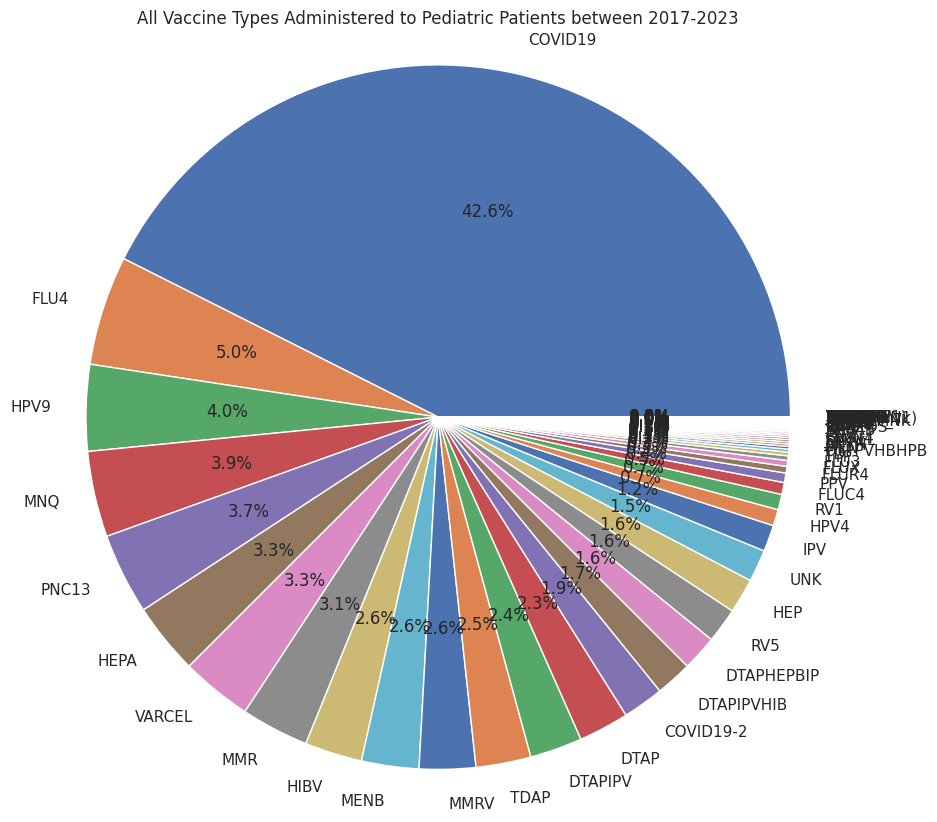

In [434]:
# pie chart of vax type frequencies
plt.pie(frequency, labels=frequency.index, autopct='%1.1f%%')
plt.title('All Vaccine Types Administered to Pediatric Patients between 2017-2023')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [438]:
merged_df['VAX_TYPE'].tail()

231612         DTAP
231613         HEPA
231615          IPV
231616    COVID19-2
231617          IPV
Name: VAX_TYPE, dtype: object

In [439]:
ped_vax = ['6VAX-F', 'COVID19', 'COVID19-2', 'DF', 'DPIPV', 'DPP', 'DTAP', 'DT', 'DTAPH', 'DTAPHEPBIP', 'DTAPIPV', 'DTAPIPVHIB', 'DTAPIPVHIBHEP', 'DTIPV', 'DTOX', 'DTP', 'DTPHIB', 'DTPHEP', 'DTPIHI', 'DTPIPV', 'DTPPHIB', 'FLU(H1N1)', 'FLU3', 'FLUA3', 'FLUC3', 'FLU4', 'FLUA4', 'FLUC4', 'FLUN(H1N1)', 'FLUN3', 'FLUN4', 'FLUR3', 'FLUR4', 'FLUX', 'FLUX(H1N1)', 'HBHEPB', 'HBPV', 'HEP', 'HEPA', 'HEPAB', 'HEPATYP', 'HIBV', 'HPV2', 'HPV4', 'HPV9', 'HPVX', 'IPV', 'MEA', 'MEN', 'MENB', 'TD', 'MENHIB', 'MER', 'MMR', 'MMRV', 'MNC', 'MNQ', 'MINQHIB', 'MM', 'MMR', 'MU', 'MUR', 'OPV', 'PNC', 'PNC10', 'PNC13', 'PPV', 'RUB', 'RV', 'RV1', 'RV5', 'RVX', 'TDAP', 'TDAPIPV', 'UNK', 'VARCEL', 'VARZOS']

merged_df = merged_df[merged_df['VAX_TYPE'].isin(ped_vax)]


In [440]:
frequency = merged_df['VAX_TYPE'].value_counts()
print(frequency)

COVID19    94487
FLU4       11151
HPV9        8787
MNQ         8742
PNC13       8262
           ...  
DTPHEP         2
HEPATYP        2
DPP            2
DTIPV          1
MU             1
Name: VAX_TYPE, Length: 67, dtype: int64


In [441]:
group_mapping = {
    'DTAP': ['DPIPV', 'DPP', 'DTAP', 'DTAPH', 'DTAPHEPBIP', 'DTAPIPV', 'DTAPIPVHIB', 'DTAPIPVHIBHEP'],
    'DT': ['DTIPV', 'DTOX', 'DTP', 'DTPHIB', 'DTPHEP', 'DTPIHI', 'DTPIPV', 'DTPPHIB'],
    'FLU(H1N1)': ['FLU(H1N1)', 'FLU3', 'FLUA3', 'FLUC3', 'FLU4', 'FLUA4', 'FLUC4', 'FLUN(H1N1)', 'FLUN3', 'FLUN4', 'FLUR3', 'FLUR4', 'FLUX', 'FLUX(H1N1)'],
    'HIB': ['HBHEPB', 'HBPV', 'HIBV'],
    'HEPB': ['HEP'],
    'HEPA': ['HEPA', 'HEPATYP'],
    'HPV': ['HPV2', 'HPV4', 'HPV9', 'HPVX'],
    'MEN': ['MEN', 'MNC', 'MNQ', 'MINQHIB', 'MENHIB', 'MU', 'RUB', 'MEA'], #inlcuding mealses, mumps, rubella variants
    'MMR': ['MMR', 'MMRV'],
    'PNC': ['PNC', 'PNC10', 'PNC13'],
    'RV': ['RV', 'RV1', 'RV5', 'RVX'],
    'TDAP': ['TD', 'TDAP', 'TDAPIPV'],
    'IPV': ['OPV']
}

merged_df['VAX_TYPE'] = merged_df['VAX_TYPE'].apply(lambda x: next((group for group, vaccines in group_mapping.items() if x in vaccines), x))


In [442]:
frequency = merged_df['VAX_TYPE'].value_counts()
print(frequency)

COVID19      94487
DTAP         17792
FLU(H1N1)    14615
MMR          12641
HPV          10685
MEN           9000
PNC           8440
HEPA          7283
VARCEL        7235
TDAP          5912
HIB           5857
MENB          5833
RV            5322
COVID19-2     4174
HEPB          3549
UNK           3271
IPV           2720
PPV            967
HEPAB          152
VARZOS         135
DT              90
6VAX-F          31
DF              13
Name: VAX_TYPE, dtype: int64


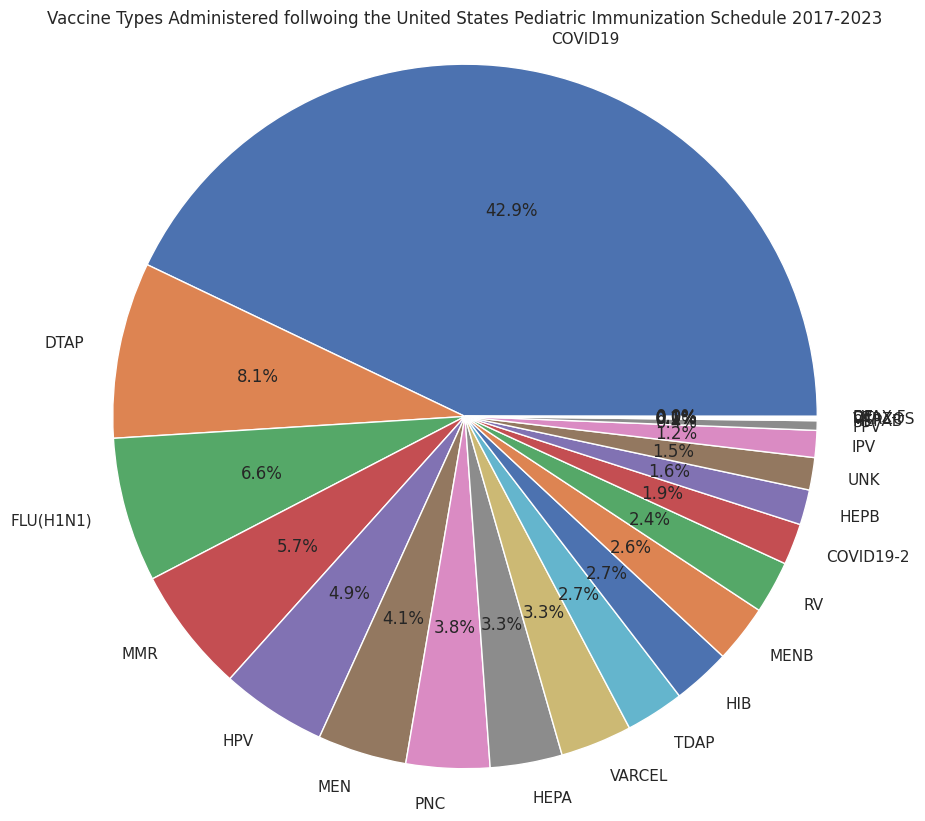

In [443]:
# pie chart of vax type frequencies
plt.pie(frequency, labels=frequency.index, autopct='%1.1f%%')
plt.title('Vaccine Types Administered follwoing the United States Pediatric Immunization Schedule 2017-2023')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [444]:
merged_df.shape

(220204, 31)

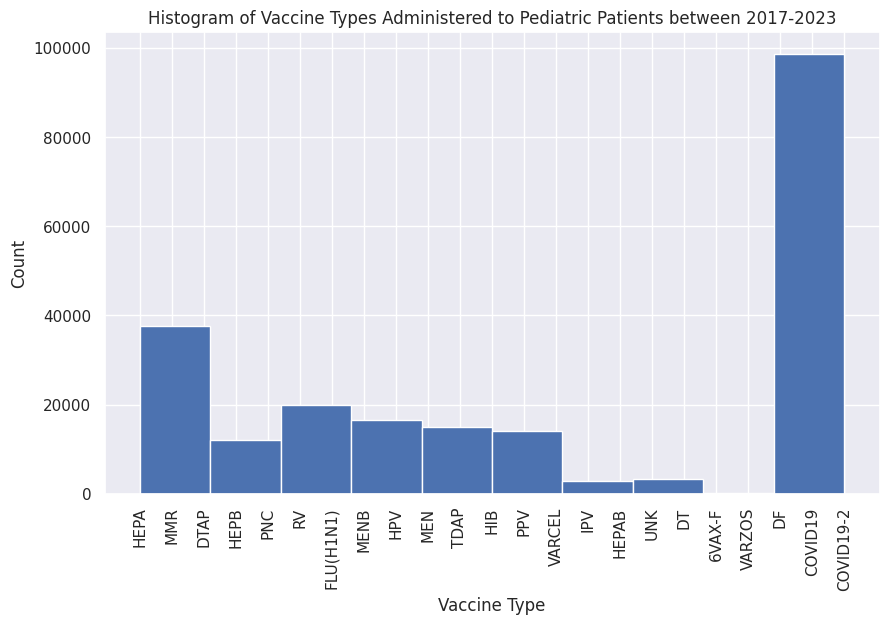

In [448]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

# Histogram
plt.hist(merged_df['VAX_TYPE'])
plt.xlabel('Vaccine Type')
plt.ylabel('Count')

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.title('Histogram of Vaccine Types Administered to Pediatric Patients between 2017-2023')

#plt.tight_layout()  # Adjust spacing
plt.show()


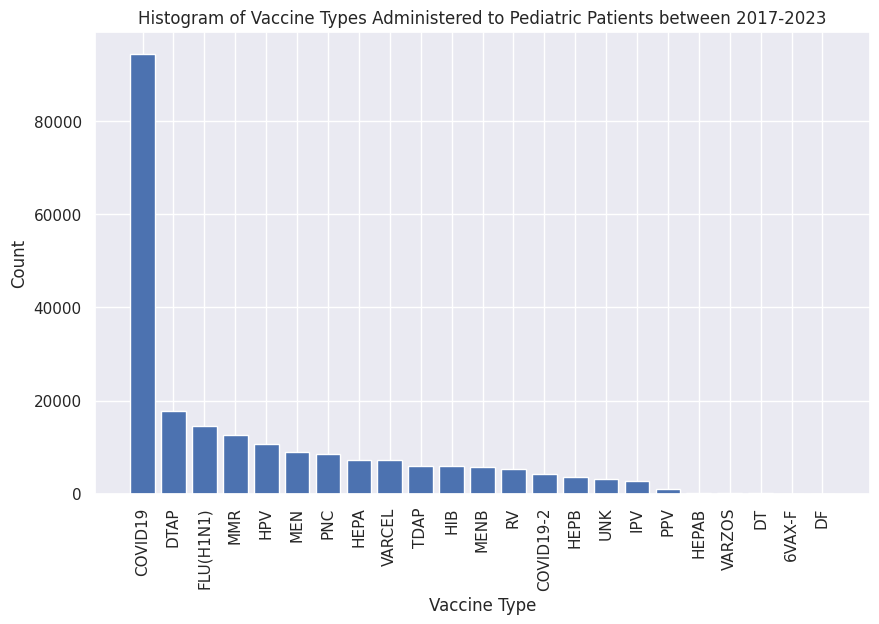

In [449]:
import matplotlib.pyplot as plt

# Calculate the count of each vaccine type
vaccine_counts = merged_df['VAX_TYPE'].value_counts()

# Set figure size
plt.figure(figsize=(10, 6))

# Bar plot
plt.bar(vaccine_counts.index, vaccine_counts.values)
plt.xlabel('Vaccine Type')
plt.ylabel('Count')

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.title('Histogram of Vaccine Types Administered to Pediatric Patients between 2017-2023')

plt.show()


#### Dropping Columns

In [ ]:
merged_df = merged_df.drop(columns = ['SPLTTYPE'])

In [ ]:
merged_df = merged_df.drop(columns = ['PRIOR_VAX'])

In [ ]:
merged_df = merged_df.drop(columns = ['OTHER_MEDS'])

In [ ]:
merged_df = merged_df.drop(columns = ['LAB_DATA'])

In [ ]:
merged_df = merged_df.drop(columns = ['VAX_NAME'])

In [ ]:
# sum of all missing values in DATA2019 dataframe
merged_df.isna().sum()

VAERS_ID        0
AGE_YRS         0
SEX             0
DIED            0
L_THREAT        0
ER_VISIT        0
HOSPITAL        0
HOSPDAYS        0
X_STAY          0
DISABLE         0
RECOVD          0
NUMDAYS         0
BIRTH_DEFECT    0
OFC_VISIT       0
ER_ED_VISIT     0
ALLERGIES       0
SYMPTOM1        0
SYMPTOM2        0
SYMPTOM3        0
SYMPTOM4        0
SYMPTOM5        0
VAX_TYPE        0
AGE_BUCKET      0
dtype: int64

In [451]:
file_path = '/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/cleaned_NoFilter_data.csv'
merged_df.to_csv(file_path, index=False)

In [452]:
len(set_symptoms)

3790

### NLTK EDA

In [ ]:
# NLTK Import packages
import pandas as pd
import numpy as np

import nltk
nltk.download('punkt')

# importing word tokenize function
from nltk.tokenize import word_tokenize

# import function for sentence segmentation
from nltk.tokenize import sent_tokenize


# Create a copy of the dataframe to store the cleaned data
df_cleaned = merged_df.copy()

# Define the textual columns to clean
# Casting textual_columns to string
symptom1 = str(merged_df[['SYMPTOM1']])
symptom2 = str(merged_df[['SYMPTOM2']])
symptom3 = str(merged_df[['SYMPTOM3']])
symptom4 = str(merged_df[['SYMPTOM4']])
symptom5 = str(merged_df[['SYMPTOM5']])


# Visualizing the sentences of textual_columns with function 'sent_tokenize'
sent_tokenize(symptom1)
sent_tokenize(symptom2)
sent_tokenize(symptom3)
sent_tokenize(symptom4)
sent_tokenize(symptom5)

# Lowercasing all textual columns
#df_cleaned[textual_columns] = df_cleaned[textual_columns].apply(lambda x: x.str.lower())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['                                 SYMPTOM5\n0                 Bacterial test positive\n1       Red blood cell sedimentation rate\n2                        No adverse event\n3                   Computerised tomogram\n4                   Computerised tomogram\n...                                   ...\n231612                   No adverse event\n231613                   No adverse event\n231615                   No adverse event\n231616                   No adverse event\n231617                   No adverse event\n\n[200113 rows x 1 columns]']

In [ ]:
# splitting the unnecessary breaks \n
symptom1.split("\n")

['                            SYMPTOM1',
 '0                             Abasia',
 '1                         Blood test',
 '2                            Surgery',
 '3                         Blood test',
 '4                         Blood test',
 '...                              ...',
 '231612                     Underdose',
 '231613                     Underdose',
 '231615  Expired product administered',
 '231616                      Vomiting',
 '231617  Expired product administered',
 '',
 '[200113 rows x 1 columns]']

In [ ]:
len(symptom1)

470

In [ ]:
# function to return individual sentences
def get_sentences(text):
  sentences = []
  sub_texts = text.split("\n")
  for sub_text in sub_texts:
    sentences.extend(sent_tokenize(sub_text))
  return sentences

In [ ]:
# assigning sentences to symptom1
symptom1 = get_sentences(symptom1)
len(symptom1)

13

In [ ]:
#Import required libraries
from nltk.probability import FreqDist

In [ ]:
#Find the frequency
fdist = FreqDist(symptom1)
fdist

FreqDist({'                            SYMPTOM1': 1, '0                             Abasia': 1, '1                         Blood test': 1, '2                            Surgery': 1, '3                         Blood test': 1, '4                         Blood test': 1, '...                              ...': 1, '231612                     Underdose': 1, '231613                     Underdose': 1, '231615  Expired product administered': 1, ...})

In [ ]:
#Print 10 most common words
fdist.most_common(20)

[('                            SYMPTOM1', 1),
 ('0                             Abasia', 1),
 ('1                         Blood test', 1),
 ('2                            Surgery', 1),
 ('3                         Blood test', 1),
 ('4                         Blood test', 1),
 ('...                              ...', 1),
 ('231612                     Underdose', 1),
 ('231613                     Underdose', 1),
 ('231615  Expired product administered', 1),
 ('231616                      Vomiting', 1),
 ('231617  Expired product administered', 1),
 ('[200113 rows x 1 columns]', 1)]

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
# Initialize a named entity recognizer
#ner = nltk.ne_chunk

# Get named entities and their labels
#df_data2019['SYMPTOM_TEXT'] = df_data2019['SYMPTOM_TEXT'].astype(str)  # Ensure the column is treated as string
#named_entities = []
#for sentence in df_data2019['SYMPTOM_TEXT']:
    #named_entities.extend(nltk.chunk.tree2conlltags(ner(nltk.pos_tag(nltk.word_tokenize(sentence)))))

# Count the frequency of each named entity label
#frequency = nltk.FreqDist(entity[2] for entity in named_entities)

# Plot the bar chart
#labels, counts = zip(*frequency.items())
#plt.figure(figsize=(10, 6))
#plt.bar(labels, counts)
#plt.xlabel('Named Entity Labels')
#plt.ylabel('Frequency')
#plt.title('Frequency of Named Entities')
#plt.xticks(rotation=45)
#plt.show()

In [ ]:
# importing packages:
import string
string.punctuation

# function to remove all punctuation
def remove_punctuations(words):
  #Empty list to store words:
  words_no_punc = []
  for word in words:
    if word not in string.punctuation:
      #note_words_no_punc.append(note_word)
      words_no_punc.append(word.lower())
  return words_no_punc

# importing packages
from nltk.corpus import stopwords
nltk.download('stopwords')

#List of stopwords
stopwords = stopwords.words("english")
print(stopwords)

# function to remove stopwords
def remove_stopwords(words):
  #Empty list to store clean words :
  clean_words = []

  for word in words:
    if word not in stopwords:
        clean_words.append(word)
  return clean_words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Import packages
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # Tokenization
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)

    # Removing Stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Joining tokens back to text
    cleaned_text = ' '.join(tokens)

    return cleaned_text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Applying clean_text: 'SYMPTOM1'
merged_df['SYMPTOM1'] = str(merged_df['SYMPTOM1'])
merged_df['SYMPTOM1'] = merged_df['SYMPTOM1'].apply(clean_text)

In [ ]:
# Applying clean_text: 'SYMPTOM1'
merged_df['SYMPTOM2'] = str(merged_df['SYMPTOM2'])
merged_df['SYMPTOM2'] = merged_df['SYMPTOM2'].apply(clean_text)

In [ ]:
# Applying clean_text: 'SYMPTOM1'
merged_df['SYMPTOM3'] = str(merged_df['SYMPTOM3'])
merged_df['SYMPTOM3'] = merged_df['SYMPTOM3'].apply(clean_text)

In [ ]:
# Applying clean_text: 'SYMPTOM1'
merged_df['SYMPTOM4'] = str(merged_df['SYMPTOM4'])
merged_df['SYMPTOM4'] = merged_df['SYMPTOM4'].apply(clean_text)

In [ ]:
# Applying clean_text: 'SYMPTOM1'
merged_df['SYMPTOM5'] = str(merged_df['SYMPTOM5'])
merged_df['SYMPTOM5'] = merged_df['SYMPTOM5'].apply(clean_text)

In [ ]:
# Applying clean_text: 'SYMPTOM1'
merged_df['ALLERGIES'] = str(merged_df['ALLERGIES'])
merged_df['ALLERGIES'] = merged_df['ALLERGIES'].apply(clean_text)

In [ ]:
text_cols = merged_df[['ALLERGIES','SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']]

In [ ]:
text_cols.head()

,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,0 nkda 1 nkda 2 nkda 3 nkda 4 nkda 231612 nkda...,0 abasia 1 blood test 2 surgery 3 blood test 4...,0 arthritis infective 1 c reactive protein 2 u...,0 aspiration joint 1 gait disturbance 2 x ray ...,0 bacterial infection 1 injection site swellin...,0 bacterial test positive 1 red blood cell sed...
1,0 nkda 1 nkda 2 nkda 3 nkda 4 nkda 231612 nkda...,0 abasia 1 blood test 2 surgery 3 blood test 4...,0 arthritis infective 1 c reactive protein 2 u...,0 aspiration joint 1 gait disturbance 2 x ray ...,0 bacterial infection 1 injection site swellin...,0 bacterial test positive 1 red blood cell sed...
2,0 nkda 1 nkda 2 nkda 3 nkda 4 nkda 231612 nkda...,0 abasia 1 blood test 2 surgery 3 blood test 4...,0 arthritis infective 1 c reactive protein 2 u...,0 aspiration joint 1 gait disturbance 2 x ray ...,0 bacterial infection 1 injection site swellin...,0 bacterial test positive 1 red blood cell sed...
3,0 nkda 1 nkda 2 nkda 3 nkda 4 nkda 231612 nkda...,0 abasia 1 blood test 2 surgery 3 blood test 4...,0 arthritis infective 1 c reactive protein 2 u...,0 aspiration joint 1 gait disturbance 2 x ray ...,0 bacterial infection 1 injection site swellin...,0 bacterial test positive 1 red blood cell sed...
4,0 nkda 1 nkda 2 nkda 3 nkda 4 nkda 231612 nkda...,0 abasia 1 blood test 2 surgery 3 blood test 4...,0 arthritis infective 1 c reactive protein 2 u...,0 aspiration joint 1 gait disturbance 2 x ray ...,0 bacterial infection 1 injection site swellin...,0 bacterial test positive 1 red blood cell sed...


### Vectorization

In [ ]:
# creating dataframe subset
df_subset = text_cols

#### Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(df_subset)

#### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of TfidfVectorizer
#vect = TfidfVectorizer()

# Fit and transform the text data
#X = vect.fit_transform(df_subset['SYMPTOM1'])

In [ ]:
# Initialize the TfidfVectorizer
vect = TfidfVectorizer()

#feature_names = vect.get_feature_names_out()
#pd.DataFrame(X.toarray(), columns=feature_names)

# Fit and transform each text column separately
text_encoded = {}
for col in text_cols:
    text_encoded[col] = vect.fit_transform(text_cols[col])
    feature_names = vect.get_feature_names_out()
    text_df = pd.DataFrame(text_encoded[col].toarray(), columns=feature_names)


In [ ]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))

Vocabulary size: 23
Vocabulary content:
 {'bacterial': 7, 'test': 21, 'positive': 16, 'red': 18, 'blood': 8, 'cell': 9, 'sedimentation': 19, 'rate': 17, 'adverse': 6, 'event': 12, 'computerised': 10, 'tomogram': 22, '231612': 1, '231613': 2, '231615': 3, '231616': 4, '231617': 5, 'name': 14, 'symptom5': 20, 'length': 13, '200113': 0, 'dtype': 11, 'object': 15}


In [ ]:
text_df.head()

,200113,231612,231613,231615,231616,231617,adverse,bacterial,blood,cell,...,length,name,object,positive,rate,red,sedimentation,symptom5,test,tomogram
0,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.603023,0.100504,0.100504,0.100504,...,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.201008
1,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.603023,0.100504,0.100504,0.100504,...,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.201008
2,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.603023,0.100504,0.100504,0.100504,...,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.201008
3,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.603023,0.100504,0.100504,0.100504,...,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.201008
4,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.603023,0.100504,0.100504,0.100504,...,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.100504,0.201008


In [ ]:
text_df.isna().sum()

200113           0
231612           0
231613           0
231615           0
231616           0
231617           0
adverse          0
bacterial        0
blood            0
cell             0
computerised     0
dtype            0
event            0
length           0
name             0
object           0
positive         0
rate             0
red              0
sedimentation    0
symptom5         0
test             0
tomogram         0
dtype: int64

In [ ]:
text_df.shape

(200113, 23)

### Binary Columns One-Hot-Encoding

In [ ]:
merged_df.columns

Index(['VAERS_ID', 'AGE_YRS', 'SEX', 'DIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'NUMDAYS',
       'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES', 'SYMPTOM1',
       'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5', 'VAX_TYPE',
       'AGE_BUCKET'],
      dtype='object')

In [ ]:
binary_cols = merged_df[['SEX', 'DIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'NUMDAYS',
       'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'VAX_TYPE', 'AGE_BUCKET']]

In [ ]:
columns_to_encode = ['SEX', 'DIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY',
                     'DISABLE', 'RECOVD', 'NUMDAYS', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'VAX_TYPE', 'AGE_BUCKET']

In [ ]:
# Create dummy columns for categorical variables
prefix_cols = ['AGE_BUCKET', 'SEX', 'DIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'NUMDAYS',
       'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'VAX_TYPE']
dummy_cols = ['AGE_BUCKET', 'SEX', 'DIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'NUMDAYS',
       'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'VAX_TYPE']
# one-hot-encode categorical variables using dummies
binary_cols = pd.get_dummies(binary_cols, prefix=prefix_cols, columns=dummy_cols)

In [ ]:
binary_cols.shape

(200113, 879)

In [ ]:
binary_cols.isna().sum()

AGE_BUCKET_adolescent    0
AGE_BUCKET_child         0
AGE_BUCKET_infant        0
AGE_BUCKET_neonate       0
AGE_BUCKET_toddler       0
                        ..
VAX_TYPE_RV              0
VAX_TYPE_TDAP            0
VAX_TYPE_UNK             0
VAX_TYPE_VARCEL          0
VAX_TYPE_VARZOS          0
Length: 879, dtype: int64

In [ ]:
binary_cols.dtypes

AGE_BUCKET_adolescent    uint8
AGE_BUCKET_child         uint8
AGE_BUCKET_infant        uint8
AGE_BUCKET_neonate       uint8
AGE_BUCKET_toddler       uint8
                         ...  
VAX_TYPE_RV              uint8
VAX_TYPE_TDAP            uint8
VAX_TYPE_UNK             uint8
VAX_TYPE_VARCEL          uint8
VAX_TYPE_VARZOS          uint8
Length: 879, dtype: object

### Concatenate TF-IDF Text Data and Binary Data

In [ ]:
# Reset the indexes of 'binary_cols' and 'text_df'
binary_cols.reset_index(drop=True, inplace=True)
text_df.reset_index(drop=True, inplace=True)

# Concatenate the binary and text dataframes
encoded_df = pd.concat([binary_cols, text_df], axis=1)


In [ ]:
encoded_df.isna().sum()

AGE_BUCKET_adolescent    0
AGE_BUCKET_child         0
AGE_BUCKET_infant        0
AGE_BUCKET_neonate       0
AGE_BUCKET_toddler       0
                        ..
red                      0
sedimentation            0
symptom5                 0
test                     0
tomogram                 0
Length: 902, dtype: int64

In [ ]:
# Check for NaN values
nan_locations = encoded_df.isna()

print(nan_locations)

        AGE_BUCKET_adolescent  AGE_BUCKET_child  AGE_BUCKET_infant  \
0                       False             False              False   
1                       False             False              False   
2                       False             False              False   
3                       False             False              False   
4                       False             False              False   
...                       ...               ...                ...   
200108                  False             False              False   
200109                  False             False              False   
200110                  False             False              False   
200111                  False             False              False   
200112                  False             False              False   

        AGE_BUCKET_neonate  AGE_BUCKET_toddler  SEX_0  SEX_1  DIED_0  DIED_1  \
0                    False               False  False  False   False   False   

In [ ]:
file_path = '/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/encoded_agecategories_data.csv'
encoded_df.to_csv(file_path, index=False)



In [ ]:
file_path = '/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/cleaned_data.csv'
merged_df.to_csv(file_path, index=False)